# Importing the basic libaries -

In [27]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000)

# Loading the Data--

In [28]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f'Train: X - {X_train.shape}, y - {Y_train.shape}')
print(f'Test: X - {X_test.shape}, y - {Y_test.shape}')

Train: X - (60000, 28, 28), y - (60000,)
Test: X - (10000, 28, 28), y - (10000,)


#### Displaying an image from the dataset

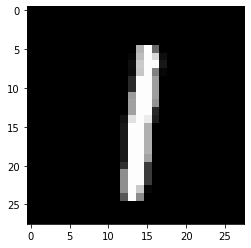



Label in dataset: 1


In [29]:
plt.imshow(X_train[40],cmap='gray')
plt.show()
print(f"\n\nLabel in dataset: {Y_train[40]}")

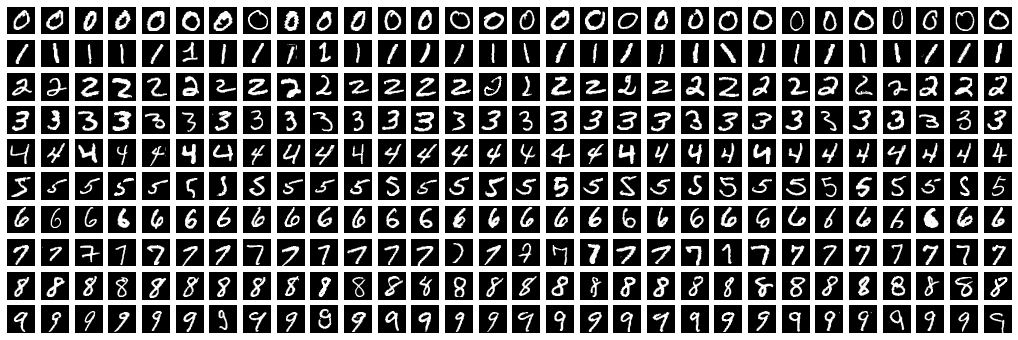

In [30]:
# Sample images for all digits

digits = np.unique(Y_train)
M = 30
dim = 28
fig, axs = plt.subplots(len(digits), M, figsize=(18,6))

for i,d in enumerate(digits):
    for j in range(M):
        axs[i,j].imshow(X_train[Y_train==d][j].reshape((dim,dim)), cmap='gray')
        axs[i,j].axis('off')

In [31]:
#Displaying the contents of 41th image (the choice of index 41 is random here)
X_train[40]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 178, 255, 105,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [32]:
#displaying the contents of Y_train for 41st image 
Y_train[40]

1

In [33]:
unique, counts = np.unique(Y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


In [34]:
# flattening single example 
example = X_train[40].reshape((-1))
print(type(example))
print("Shape:", example.shape)

<class 'numpy.ndarray'>
Shape: (784,)


# **Pre-processing:**

**Flattening the input values-** Because we are using a simple FFNN, it would be better to convert all the input images of size ${28*28}$ to a size of ${784*1}$ i.e to convert each input from a 2D array to a 1D array.

In [35]:
# flattening the input

X_train_flattened = X_train.reshape((X_train.shape[0], -1))
X_test_flattened = X_test.reshape((X_test.shape[0], -1))

print(f"Shapes - Train: {X_train_flattened.shape}, Test: {X_test_flattened.shape}")

Shapes - Train: (60000, 784), Test: (10000, 784)


**Normalizing input values:**

We often need to normalize the input values into a convinient range. Let us see what is the current range of pixel values:

In [36]:
print("Minimum pixel value =", X_train_flattened.min())
print("Maximum pixel value =", X_train_flattened.max())

Minimum pixel value = 0
Maximum pixel value = 255


As the pixel values lies between the range 0 and 255, we want to normalize the input such that values of the pixels lies in the range (0,1). So, to normalize, we will divide each input values by the maximum pixel value which in this case is 255. 

**Normalizing the dataset:** 

In [37]:
X_normalized_train = np.round(X_train_flattened/X_train_flattened.max(), 3)
X_normalized_test = np.round(X_test_flattened/X_train_flattened.max(), 3)

print("Minimum pixel value =", X_normalized_train.min())
print("Maximum pixel value =", X_normalized_train.max())

Minimum pixel value = 0.0
Maximum pixel value = 1.0


**Normalized and flattened data can still be visaulized just like original data-**

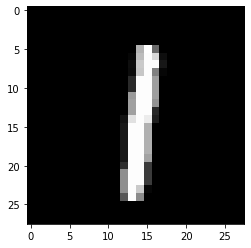

In [38]:
# normalized and flattened data can still be visualized as original data
plt.imshow(X_normalized_train[40].reshape(28,28), cmap='gray')
plt.show()

So, we can see that normalizing does not effect the nature of data. So, we will use this normalized and flattened layer as the input to our neural network.

# **Creating datasets for binary and multiclass classification-**

## **Binary Classification problem-**

MNIST dataset has 10 different target classes, each representing one of the digits from 0-9. Let's consider digits '**0**' and '**1**' for binary classification. We will take only these inputs drom the original dataset-

**Creating the dataset-**

In [39]:
train_idx = np.where((Y_train==0) | (Y_train==1))
X_train_bin = X_normalized_train[train_idx]
Y_train_bin = Y_train[train_idx]

test_idx = np.where((Y_test==0) | (Y_test==1))
X_test_bin = X_normalized_test[test_idx]
Y_test_bin = Y_test[test_idx]

print(f'Trainset shapes - X: {X_train_bin.shape}, Y: {Y_train_bin.shape}')
print(f'Testset shapes - X: {X_test_bin.shape}, Y: {Y_test_bin.shape}')

print(f'\nTrain statistics - 0: {(Y_train_bin==0).sum()}, 1: {(Y_train_bin==1).sum()}')
print(f'Test statistics - 0: {(Y_test_bin==0).sum()}, 1: {(Y_test_bin==1).sum()}')

Trainset shapes - X: (12665, 784), Y: (12665,)
Testset shapes - X: (2115, 784), Y: (2115,)

Train statistics - 0: 5923, 1: 6742
Test statistics - 0: 980, 1: 1135


We now have only 0's and 1's in the newly created subset of the dataset. As we can see that count of 0's and 1's is quite even. So, the dataset is quite evenly balanced.

**Splitting the training dataset-**

Often it is observed that training a model for a large number of epochs leads to the model overfitting very much to the training data set. To tackle this issue, we need a validation dataset to keep track of the 'validation performance'. So, we will now split the current training dataset (of 11344 instances) into a training set and validation set.

In [40]:
from sklearn.model_selection import train_test_split

We can use this library to split our data. 

In general, a split of 90-10, 80-20, 67-33 etc. is used. You can choose your own value as it is always a tradeoff. 

We will go with 80-20 split.

In [41]:
X_train_bin, X_val_bin, Y_train_bin, Y_val_bin = train_test_split(X_train_bin, Y_train_bin, test_size=0.2, random_state = 1)

In [42]:
print("Instances in new train-set:", len(Y_train_bin))
print("Instances in val-set:", len(Y_val_bin))
print("\nCount of 0s and 1s in train-set:", (Y_train_bin==0).sum(), (Y_train_bin==1).sum())
print("Count of 0s and 1s in val-set:", (Y_val_bin==0).sum(), (Y_val_bin==1).sum())

Instances in new train-set: 10132
Instances in val-set: 2533

Count of 0s and 1s in train-set: 4743 5389
Count of 0s and 1s in val-set: 1180 1353


In [43]:
# Traspose feature matrices as per our model requirement

X_train_bin, X_val_bin, X_test_bin = X_train_bin.T, X_val_bin.T, X_test_bin.T
print(f'Shapes - {X_train_bin.shape, X_val_bin.shape, X_test_bin.shape}')

Shapes - ((784, 10132), (784, 2533), (784, 2115))


# Building the Neural Net class:

 **Forward Pass-**

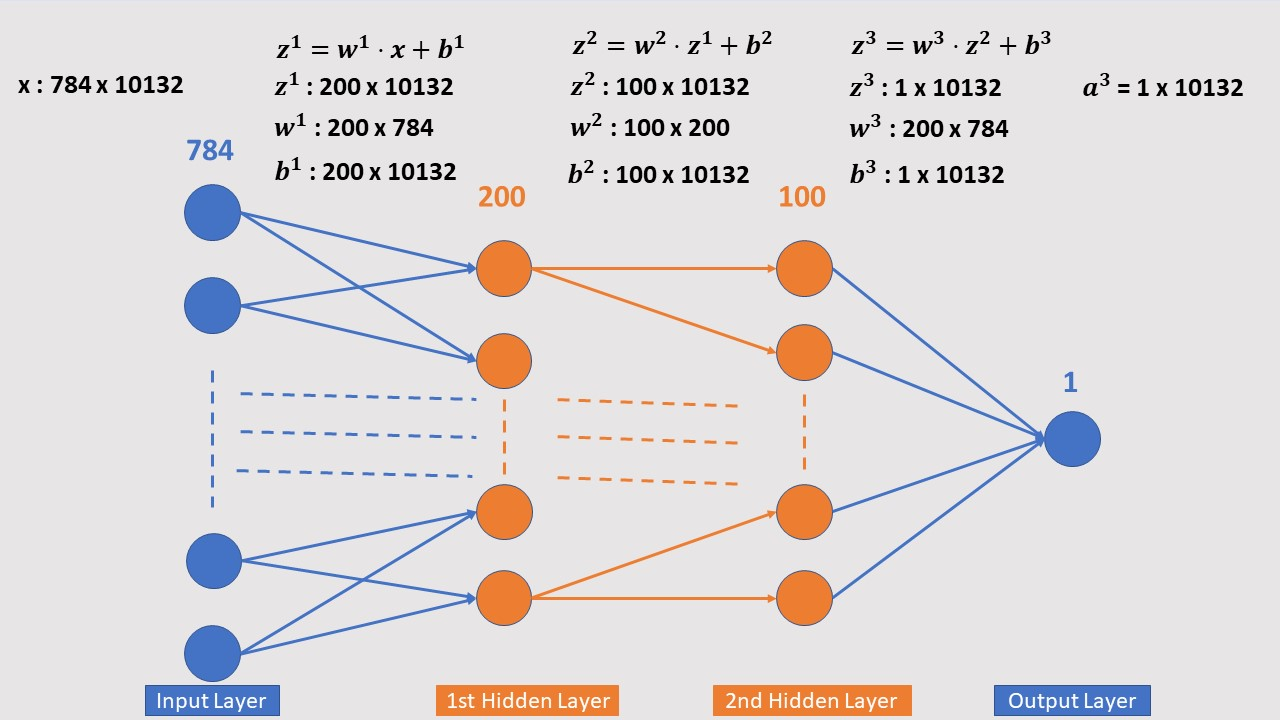

 **Equations of Backpropagation-**

**Recall:** $W^\ell$ represents the matrix of weights connecting layer $\ell − 1$ to
layer $\ell$.

**Recall:** $δ^\ell$ represents the error gradients with respect to the activations at the layer $\ell$.



## Gradients at the output layer:  

Now, the gradient with respect to weights for output layer would be- 

$\frac{\partial e}{\partial w_{i j}^{L}}=\frac{\partial e}{\partial z_i^{L}} a_j^{L-1}=\frac{\partial e}{\partial a_i^{L}} \phi^{\prime}\left(z_i^{L}\right) a_j^{L-1}$

Collecting these partial derivatives into a matrix we get: 

$\nabla_{W^L} e= \operatorname{Diag}\left({\phi^L}'\right) \delta^L (a^{L-1})^\top$ 

where 

$\delta^L = \begin{bmatrix} \frac{\partial e}{\partial a_1^{L}} \ldots \frac{\partial e}{\partial a_{N_L}^{L}} \end{bmatrix}^\top$. 


Similarly, the gradient with respect to bias at output layer would be- 

$\frac{\partial e}{\partial b_{i}^{L}}=\frac{\partial e}{\partial z_i^{L}}\cdot 1 =\frac{\partial e}{\partial a_i^{L}} \phi^{\prime}\left(z_i^{L}\right)$

Now, these gradients can be collected into a vector:

$\nabla_{b^L} e= \operatorname{Diag}\left( \phi^{L'} \right) \delta^L$.


## Gradient in the hidden layer: 

The gradient with respect to weights for hidden layers would be-

$\nabla_{W^{\ell}} e=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell}\left(a^{\ell-1}\right)^{\top}=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) V^{\ell+1} \ldots V^L \delta^L\left(a^{\ell-1}\right)^{\top}$ 

$\text { where } V^{\ell+1}=\left(W^{\ell+1}\right)^{\top} \operatorname{Diag}\left(\phi^{\ell+1^{\prime}}\right) \text {. }$

And the gradient with respect to bias at hidden layers would be- 

$\nabla_{b^{\ell}} e=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell}=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) V^{\ell+1} \ldots V^L \delta^L$.


# NN Implementation

In [75]:
class Neural_Network():
    def __init__(self, neurons, Activations, initialization='randn',SEED=2000):
        """Define the NN design parameters
        Args:
            neurons (int array): list of numbers listing neurons for each layer
            Activations (str array): list of activations to be used for hidden and output layers
            initialization (str, optional): Choose weight initialization from
             uniform or normal distribution. Defaults to 'randn'.
        """
        
        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] # weights for each layer
        self.biases = [] # biases in each layer 
        self.layer_activations = [] # activations in each layer
        self.SEED=SEED
        np.random.seed(SEED)
        
        if initialization == 'rand':
            self.initializer = np.random.rand
        elif initialization == 'randn':
            self.initializer = np.random.randn
        else:
            raise ValueError("initialization must be 'rand' or 'randn'")
        for i in range(len(neurons)-1):
            self.weights.append(self.initializer(neurons[i+1],neurons[i])) # weight matrix between layer i and layer i+1
            self.biases.append(self.initializer(neurons[i+1],1))
            self.layer_activations.append(Activations[i].lower()) # activations for each layer
        
            
    def sigmoid(self, z):
        """returns result of the sigmoid activation function on input z."""    
        #z=np.clip( z, -500, 500 )      #to avoid overflow 
        return 1.0/(1.0+np.exp(-z))
    
    def sigmoidPrime(self,z):
        """returns derivative of sigmoid activation function applied on input z."""
        return self.sigmoid(z)*(1-self.sigmoid(z))

                          
    def tanh(self, z):
        """returns result of the tanh sigmoid activation function on input z."""   
        z=np.clip( z, -100, 100 )      #to avoid overflow          
        return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    
    def tanhPrime(self,z):
        """returns derivative of hyperbolic tan activation function applied on input z."""
        return 1-self.tanh(z)**2

    def stanh(self,z):
        return z*self.tanh(z)

    def stanhPrime(self,z):
        return z*self.tanhPrime(z)+self.tanh(z)

  
                          
    def linear(self, z):
        """returns result of the linear activation function on input z."""  
        z=np.clip( z, -500, 500 )                                  
        return z
    
    def linearPrime(self,z):
        """returns derivative of linear activation function applied on input z."""                                                      
        return 1-(z==np.nan) #to broadcast 1 to same shape

    def ReLu(self,z):
        """returns result of the ReLU activation function on input z."""  
        z=np.clip( z, -500, 500 )                
        return np.maximum(z,0)
    
    def ReLuPrime(self,z):
        """returns derivative of ReLU activation function applied on input z."""
        return z>=0


    def aReLu(self,z,a=0.1):
        if a is None:
          raise Exception("Pass parameter 'a' along with aReLu(z,a)")
        z=np.clip( z, -500, 500 )
        return np.maximum(z,a*z)
    
    def aReLuPrime(self,z,a=0.1):
        if a is None:
          raise Exception("Pass parameter 'a' along with aReLu(z,a)")
        np.clip( z, -500, 500 )
        return a*(z<0)+(z>=0)  #returns a if z<0 else 1

    def exu(self,z,b=1.05,u=1.67):
        z=np.clip( z, -500, 500 )
        return (z>=0)*z*b+(z<0)*(b*u*(np.exp(z)-1))     
        
    def exuPrime(self,z,b=1.05,u=1.67):
        z=np.clip( z, -500, 500 )
        return (z>=0)*b+(z<0)*(b*u*np.exp(z))

    def softmax(self, z):
        """returns result of the softmax activation function on input z."""
        z=np.clip( z, -500, 500 )
        temp=np.exp(z)    #to avoid overflow it can be normalized using max(z)
        return temp/np.sum(temp,axis=0)   

    def softmaxPrime(self,z):
        #delta= lambda i,j: 1 if i==j else 0
        return self.softmax(z)*(1-self.softmax(z))


    
    #Function for different activation type
    def activate(self,z,activation):
        if activation=="sigmoid":
          return self.sigmoid(z)
        elif activation=="relu":
          return self.ReLu(z)
        elif activation=="tanh":
          return self.tanh(z)
        elif activation=="stanh":
          return self.stanh(z)
        elif activation=="arelu":
          return self.aReLu(z)
        elif activation=="exu":
          return self.exu(z)
        elif activation=="linear":
          return self.linear(z)
        elif activation=="softmax":
          return self.softmax(z)
        else:
          raise ValueError("Activation function not defined")

    #Function for prime calculation
    def activatePrime(self,z,activation):
        if activation=="sigmoid":
          return self.sigmoidPrime(z)
        elif activation=="relu":
          return self.ReLuPrime(z)
        elif activation=="tanh":
          return self.tanhPrime(z)
        elif activation=="stanh":
          return self.stanhPrime(z)
        elif activation=="arelu":
          return self.aReLuPrime(z)
        elif activation=="exu":
          return self.exuPrime(z)
        elif activation=="linear":
          return self.linearPrime(z)
        elif activation=="softmax":
          return self.softmaxPrime(z)
        else:
          raise ValueError("Activation function not defined")    


    

    
    def lossSE(self, predicted, actual):
        """Implementation of Squared-error loss function."""
        return np.mean(1/2*(predicted-actual)**2)
    
    #Question 2.c
    def lossCE(self, predicted, actual):
        """Implementation of Cross-Entropy loss function."""
        return -np.sum(np.multiply(actual, np.log(predicted)))/actual.shape[1]

    def lossBCE(self,z, actual):
        """Implementation of Cross-Entropy loss function."""
        return np.sum(np.maximum(z,0)-z*actual+np.log(1+np.exp(-np.abs(z))))/actual.shape[1]
    
    def forward(self, a):
        """Defines forward pass of the NN

        Args:
            a (array): input of size self.inputSize

        Returns: ???
        """
        #Implement forward pass  
        zs=[]   
        activations=[]   
        for w,b,activation in list(zip(self.weights,self.biases,self.layer_activations)):
          z=np.dot(w,a) + b
          zs.append(z)
          #print(activation)
          a=self.activate(z,activation)
          #if activation=="sigmoid":
          #a=self.sigmoid(z)
          activations.append(a)
        
        return activations[-1], zs,activations

        
                          
    def backward(self, x, y, zs, activations):
        """backward pass to calculate gradient of loss w.r.t. NN parameters

        Args:
            x (array): input
            y (array): ouputs from forward pass
            zs (list): layerwise intermediate outputs from forward pass
            activations (list): layerwise activations from forward pass

        Returns:
            [tuple]: gradients with respect to bias and weight parameters respectively
        """
        
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        n=zs[-1].shape[1]
        #Implement backpropagation 

        H=self.layers-2
        for l in range(H,-1,-1):
          prime=self.activatePrime(zs[l],self.layer_activations[l])
          delta_l=prime*np.dot(self.weights[l+1].T,delta_l) if l!=H else (activations[l]-y)*prime
          grad_b[l]=np.sum(delta_l,axis=1,keepdims=True) /n
          grad_w[l]=np.dot(delta_l,activations[l-1].T) /n if l!=0 else np.dot(delta_l,x.T) /n

        



        return (grad_b, grad_w)                 

    def update_parameters(self, grads, lr):
        """update the NN parameters using the gradients

        Args:
            grads (list): gradients obtained from backward pass
            lr (float): learning rate of NN
        """
        
        grad_b, grad_w = grads[0], grads[1]
        #print(len(grad_b),len(grad_w))
        #print(len(grad_b[0]),len(grad_w[0]))

        for i in range(len(self.weights)):
            #print(grad_b[i])
            self.weights[i] -=lr*grad_w[i] 
            self.biases[i] -= lr*grad_b[i]


    def error(self, X, Y, errors):  
        """Appends loss to error list"""
        if self.loss==self.lossBCE:
          y=np.squeeze(self.forward(X)[1][-1])  #passing z from last layer
        else:
          y = np.squeeze(self.forward(X)[0])

        #print(Y.shape,y.shape)
        #print(self.loss(y, Y),self.loss(y, Y).shape,"\n")
        errors.append(self.loss(y, Y))

    def copy_params(self):
        """Returns a copy of current NN parameters"""
        weights = [w.copy() for w in self.weights]
        biases = [b.copy() for b in self.biases]
        return (weights, biases)
                    
    def train(self, X, Y, lr = 1e-3, max_epochs = 1000, patience=5, batch_size = None,
              n_classes=10, onehotencoded=False, loss_func='SE', Xval=None, Yval=None, verbose=True, grad_show=False):
        """Function for training our Neural Network

        Args:
            X (ndarray): feature matrix of training data,
             Shape: (n,m) where n is no. of features and m is no. of samples.
            Y (ndarray): ground truth of training data, NOT one-hot-encoded. Shape: (1,m).
            lr (float or function, optional): constant learning rate or scheduler function.
             Defaults to 1e-3 constant lr.
            max_epochs (int, optional): epoch cap for training. Defaults to 1000.
            patience (int, optional): patience parameter for early stopping. Defaults to 5. Patients <= max_epochs
            batch_size (int, optional): mini-batch size. Defaults to full-batch GD if not provided.
            n_classes (int, optional): no. of classes for multi-class classification required if
            one-hot encoding is set to True. Defaults to 10.
            onehotencoded (bool, optional): Defaults to False.
            loss_func (str, optional): Choose from 'SE' and 'CE' loss functions. Defaults to 'SE'.
            Xval (ndarray, optional): Validation data feature matrix. Defaults to None.
            Yval (ndarray, optional): Validation data ground truth. Defaults to None.
            verbose (bool, optional): If True, displays logs and progress of training. Defaults to True.

        Returns:
            [list/tuple]: lists of train-set and validation-set losses seen over the traning process.
        """
        
        if onehotencoded:
            # a method for creating one hot encoded labels 
            def onehotencoding(Y, n):
                # one-hot encoding of class i is just the ith column of the identity 
                # matrix of size n where n is the total number of classes. so below 
                # code uses Y (a 1d array) for indexing into the identity matrix.
                return np.eye(n)[Y].T 

            Y = onehotencoding(Y, n_classes)
            if Yval is not None:
                Yval = onehotencoding(Yval, n_classes)

        # Below code ensures that Y is 2-dimensional even when one-hot encoding is not
        # performed, so our same code works for training NN for both tasks.  
        Y = np.expand_dims(Y,0) if len(Y.shape) == 1 else Y
        Yval = np.expand_dims(Yval,0) if (Yval is not None and len(Yval.shape) == 1) else Yval
        
        if loss_func == 'SE':
            self.loss = self.lossSE
        elif loss_func == 'CE':
            self.loss = self.lossCE
        elif loss_func=="BCE":
            self.loss = self.lossBCE
            
        train_errors=[]
        if Xval is not None:
            val_errors=[]
        i, j, v = 0, 0, np.inf
        best_params = self.copy_params()
        
        if batch_size is not None:
            if batch_size > len(X[0]):
                raise ValueError("invalid mini-batch size. Must be smaller than dataset length")
        else:
            batch_size = len(X[0])

        #LR control function

        if isinstance(lr, (float, int)):# constant Ir arg is passed to train get_ir lambda x: 1r # we return a function object which returns the same ir at every epoc elif callable(lr): # function in arg is passed to train
           get_lr =lambda X: lr # the function is then used to get in for a particular epoch else: raise ValueError('param Ir can only be a number or a scheduler function")
        elif callable(lr):
          get_lr =lr
        else:
          raise ValueError('param lr can only be a number or a scheduler function')

        
        gradient_w = np.zeros((self.layers-1, max_epochs)) 
        gradient_b = np.zeros((self.layers-1, max_epochs)) 

        while j < patience:

            # Shuffle Dataset
            idx = np.arange(len(X[0]))
            np.random.shuffle(idx)
            X1 = np.take(X,idx,axis=-1) 
            Y1 = np.take(Y,idx,axis=-1)

            for q in range(0,len(X1[0]),batch_size):
                start, end = q, min(len(X1[0]), q+batch_size)
                train_x = X1[:, start:end] 
                train_y = Y1[:,start:end]
                out, dot_prod_z, activations_a = self.forward(train_x)
                grads = self.backward(train_x, train_y, dot_prod_z, activations_a) # find the gradients using backward pass

                for layer in range(self.layers-1):  #storing mean gradients
                  gradient_w[layer][i] = np.sqrt(np.mean(grads[0][layer]**2))
                  gradient_b[layer][i] = np.sqrt(np.mean(grads[0][layer]**2))

                self.update_parameters(grads, get_lr(i))
            i += 1 # increment epoch count

            self.error(X, Y, train_errors)
            if Xval is not None:
                self.error(Xval, Yval, val_errors)
                #print(v)
                #print(val_errors,"\n")
                #if v is not np.inf:
                  #print(type(v))
                  #if not isinstance(v,np.float64):
                    #v=sum(v)
                #print(val_errors,v)
                if val_errors[-1] < v:
                    j = 0 # reset patience counter
                    v = val_errors[-1] # update best loss
                    best_params = self.copy_params() # save params
                else:
                    j += 1 # increment patience counter

            if verbose and i%5 == 0:
                log = f"Epoch {i}..............Loss on train = {train_errors[-1]}"
                if Xval is not None:
                    log += f", Loss on val = {val_errors[-1]}"
                print(log)
                
            if i >= max_epochs:
                break # stop if epoch threshold crossed

        if Xval is not None:
            if i >= max_epochs and verbose:
                print("Reached Epoch Cap without convergence....Terminating")
            elif verbose:
                print("Early Stopping .............. Returning best weights")

            self.weights, self.biases = best_params # reset to best params
                    
        if verbose:
            x = np.arange(1, len(train_errors)+1)
            #print(train_errors[0].shape,len(train_errors))
            #print(train_errors)
            plt.figure(figsize=(10,10))
            plt.plot(x, train_errors, label="Loss on Train")
            if Xval is not None:
                plt.plot(x, val_errors, label="Loss on Val")
            plt.legend()
            plt.title(f"{loss_func} - Learning Rate = {lr}")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.show()
            print("\n")

            if grad_show:

              fig, ax = plt.subplots(1, self.layers-1, figsize=(20, 8))

              for i in range(self.layers-1):
                  ax[i].plot(gradient_w[i])
                  ax[i].set_title(f"Gradient w.r.t. weights - layer {i+1}")
                  ax[i].set_xlabel("Epoch")
                  ax[i].set_ylabel("Gradient")
              plt.show()
              print("\n")
              fig, ax = plt.subplots(1, 1, figsize=(10, 10))

              for i in range(self.layers-1):
                  ax.plot(gradient_w[i], label=f"layer {i+1}")
              ax.set_title("Gradient w.r.t. weights ")
              ax.set_xlabel("Epoch")
              ax.set_ylabel("Gradient")
              ax.legend()
              plt.show()
              print("\n")


              fig, ax = plt.subplots(1, self.layers-1, figsize=(20, 8))

              for i in range(self.layers-1):
                  ax[i].plot(gradient_b[i])
                  ax[i].set_title(f"Gradient w.r.t. biases - layer {i+1}")
                  ax[i].set_xlabel("Epoch")
                  ax[i].set_ylabel("Gradient")
              plt.show()
              print("\n")

              fig, ax = plt.subplots(1, 1, figsize=(10, 10))

              for i in range(self.layers-1):
                  ax.plot(gradient_b[i], label=f"layer {i+1}")
              ax.set_title("Gradient w.r.t. biases")
              ax.set_xlabel("Epoch")
              ax.set_ylabel("Gradient")
              ax.legend()
              plt.show()
              print("\n")



        if Xval is not None:           
            return (train_errors, val_errors)
        return train_errors
        
    def predict(self, x):
      temp=self.forward(x)[0]
      #temp=np.squeeze(temp)
      if self.outputSize==1:
        temp=np.squeeze(temp)
        pred_class=[0 if pred<0.5 else 1 for pred in temp]
      else:
        pred_class=np.argmax(temp.T,axis=1)
      return pred_class

**Creating a MLP (Feed forward NN) model instance for our Binary classification task :**

Let's now create a simple feed-forward neural network. 

* Number of input neurons = 784.
* Number of output layer neurons = 1.

The number of hidden layers and number of neurons in each hidden layer can be decided by the user.

In [65]:
#D_in is input dimension
#H1 is dimension of first hidden layer 
#H2 is dimension of second hidden layer
#D_out is output dimension.

D_in, H1, H2, D_out = 784, 200, 100, 1 #You can add more layers or more outputs if you wish. 

neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['sigmoid','sigmoid','sigmoid'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin = Neural_Network(neurons, activation_functions, initialization='randn',SEED=2000) # There we go, creating our neural network.

## Training the model:

Epoch 5..............Loss on train = 0.012004639713959033, Loss on val = 0.014636840910628826
Epoch 10..............Loss on train = 0.004941090333965391, Loss on val = 0.0071590017474639596
Epoch 15..............Loss on train = 0.003445365168879416, Loss on val = 0.005445086896747723
Epoch 20..............Loss on train = 0.00279990576894025, Loss on val = 0.0046141697193445245
Epoch 25..............Loss on train = 0.002430073795624343, Loss on val = 0.004101013608912533
Epoch 30..............Loss on train = 0.0021800405626987676, Loss on val = 0.0037387324210257106
Epoch 35..............Loss on train = 0.001993351580109712, Loss on val = 0.0034599831575328577
Epoch 40..............Loss on train = 0.0018429414045359636, Loss on val = 0.00323850044199481
Epoch 45..............Loss on train = 0.001715788968268646, Loss on val = 0.0030518228114528707
Epoch 50..............Loss on train = 0.0016037051541305735, Loss on val = 0.002891061524434564
Epoch 55..............Loss on train = 0.00150

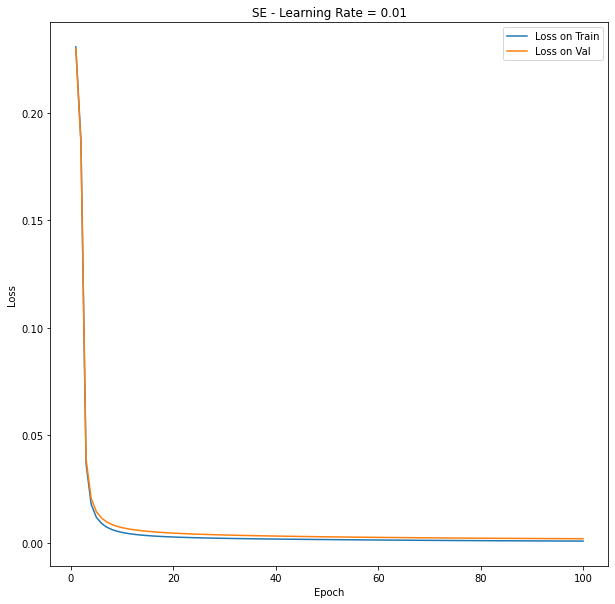

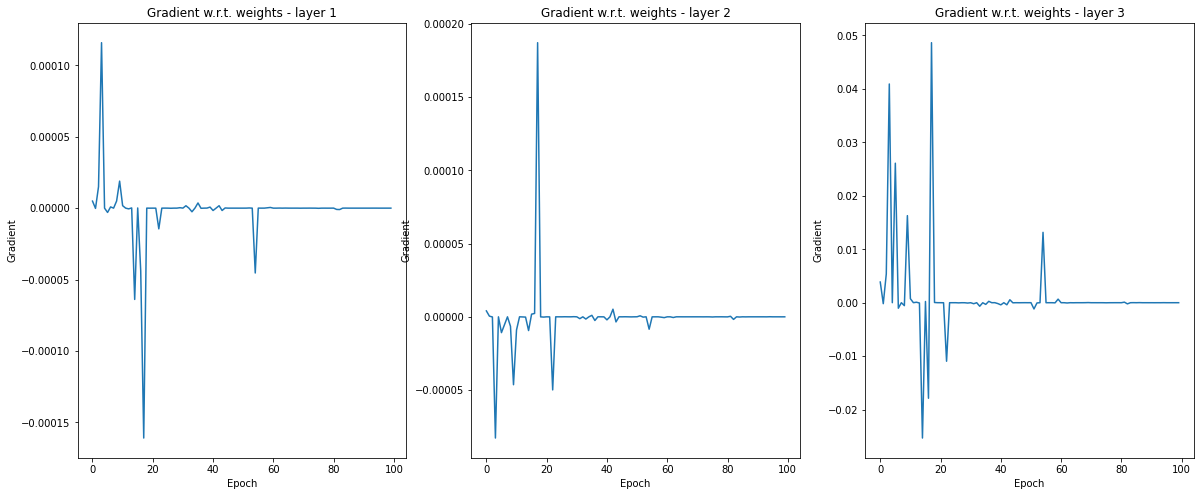

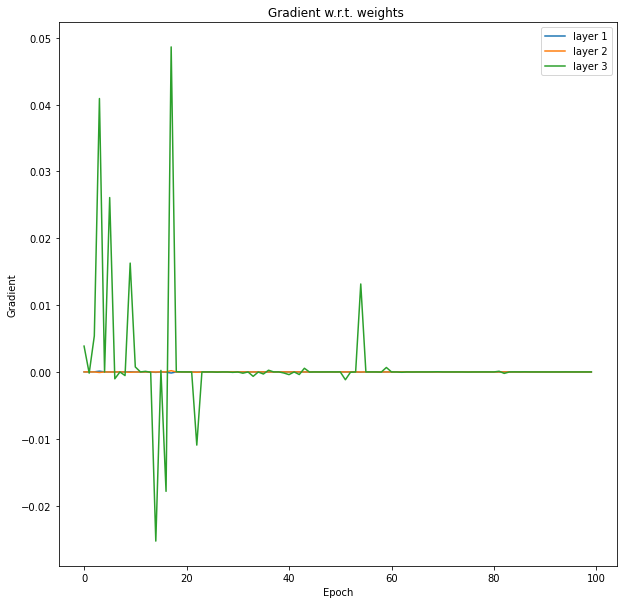

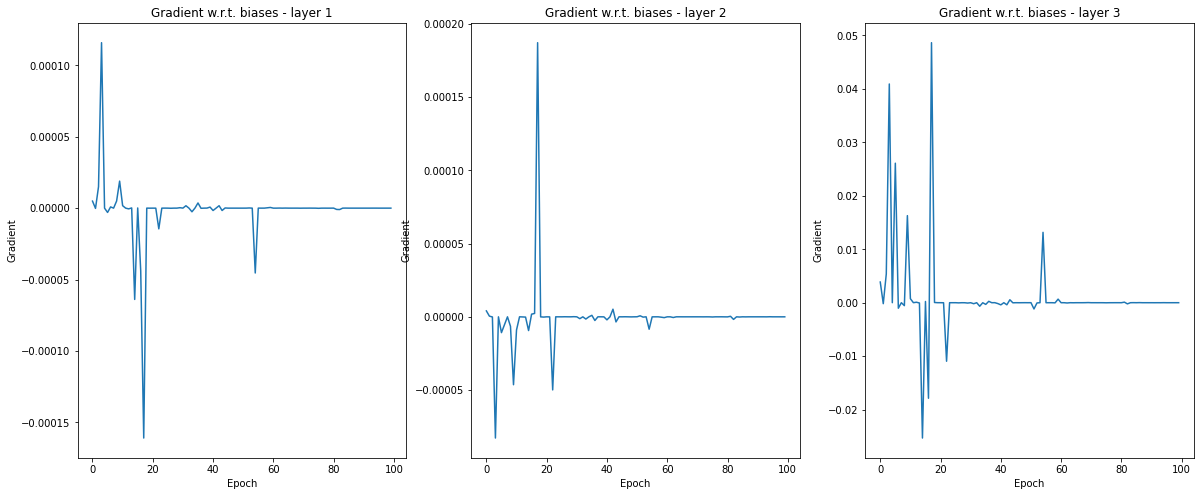

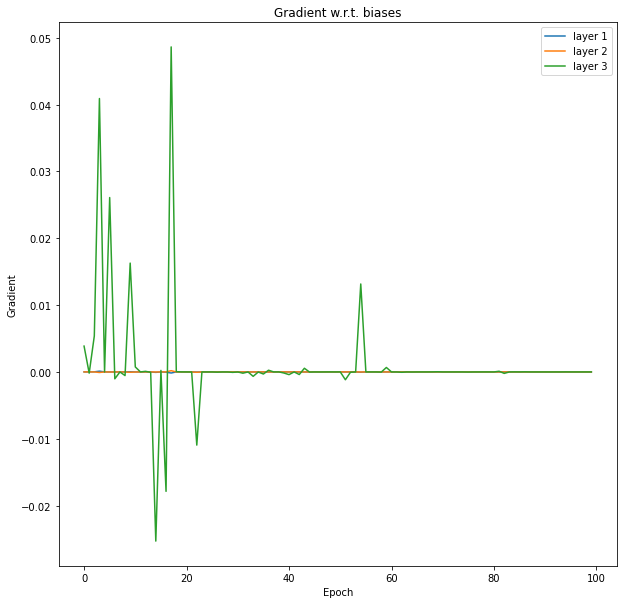

In [66]:
losses = nn_bin.train(X_train_bin, Y_train_bin, batch_size=10, lr=1e-2, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin, verbose=True, grad_show=True)

### Discussion
Above figure shoes the convergence using sigmoid activations in the hidden layer.
Accuracy and Confusion Matrix is shown below:

Model accuracy = 99.43 %



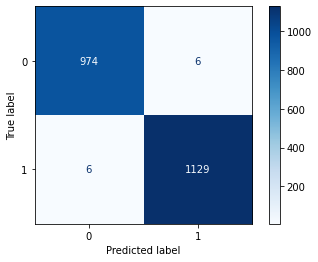


Label totals in dataset:
 [(0, 980), (1, 1135)]


In [54]:
#plotting confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_conf(Y_test,Y_pred,label=[0,1]):

  bin_score = (Y_pred == Y_test).mean()
  print("Model accuracy =", round(bin_score*100,2),"%\n")

  matrix_bin = confusion_matrix(Y_test, Y_pred)
  ConfusionMatrixDisplay(matrix_bin, display_labels=label).plot(cmap="Blues", values_format='')
  plt.show()
  print("\nLabel totals in dataset:\n", list(zip(label, np.sum(matrix_bin, axis=-1))))


plot_conf(Y_test_bin,nn_bin.predict(X_test_bin))


# Question 1

## Question a,b,c

```
    def tanh(self, z):
        """returns result of the tanh sigmoid activation function on input z."""   
        z=np.clip( z, -500, 500 )      #to avoid overflow          
        return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    
    def tanhPrime(self,z):
        """returns derivative of hyperbolic tan activation function applied on input z."""
        return 1-self.tanh(z)**2

    #Q1.a
    def stanh(self,z):
        return z*self.tanh(z)

    def stanhPrime(self,z):
        return z*self.tanhPrime(z)+self.tanh(z)

    #Q1.B
    def aReLu(self,z,a=0.1):
        if a is None:
          raise Exception("Pass parameter 'a' along with aReLu(z,a)")
        z=np.clip( z, -500, 500 )
        return np.maximum(z,a*z)
    
    def aReLuPrime(self,z,a=0.1):
        if a is None:
          raise Exception("Pass parameter 'a' along with aReLu(z,a)")
        np.clip( z, -500, 500 )
        return a*(z<0)+(z>=0)  #returns a if z<0 else 1


    #Q1.c
    def exu(self,z,b=1.05,u=1.67):
        z=np.clip( z, -500, 500 )
        return (z>=0)*z*b+(z<0)*(b*u*(np.exp(z)-1))     
        
    def exuPrime(self,z,b=1.05,u=1.67):
        z=np.clip( z, -500, 500 )
        return (z>=0)*b+(z<0)*(b*u*np.exp(z))
```



In [22]:
#This is implemented within NN class, shown here for completeness of answer
def tanh( z):
    """returns result of the tanh sigmoid activation function on input z."""   
    z=np.clip( z, -500, 500 )      #to avoid overflow          
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

def tanhPrime(z):
    """returns derivative of hyperbolic tan activation function applied on input z."""
    return 1-tanh(z)**2

#Question 1.a
def stanh(z):
    return z*tanh(z)

def stanhPrime(z):
    return z*tanhPrime(z)+tanh(z)



#Question 1. b
def aReLu(z,a=0.1):
    if a is None:
      raise Exception("Pass parameter 'a' along with aReLu(z,a)")
    return a*z if z<0 else z

def aReLuPrime(z,a=0.1):
    if a is None:
      raise Exception("Pass parameter 'a' along with aReLu(z,a)")
    return a if z<0 else 1  

#Question 1.c
def exu(z,b=1.05,u=1.67):
    if z>=0:
      return b*z
    else:
      return b*u*(np.exp(z)-1)   
    
def exuPrime(z,b=1.05,u=1.67):
    if z>=0:
      return b
    else:
      return b*u*np.exp(z)



## Question 1.d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


Epoch 5..............Loss on train = 0.25473541041725767, Loss on val = 0.2582056995451061
Epoch 10..............Loss on train = 0.2537282900478854, Loss on val = 0.2571060557645352
Epoch 15..............Loss on train = 0.25070574465506706, Loss on val = 0.2538700352897447
Epoch 20..............Loss on train = 0.24842636388371417, Loss on val = 0.2512141782583347
Epoch 25..............Loss on train = 0.24400379582416, Loss on val = 0.24859759840212664
Epoch 30..............Loss on train = 0.23931836045799096, Loss on val = 0.2449317432742144
Epoch 35..............Loss on train = 0.23416720232126048, Loss on val = 0.23958603792155336
Epoch 40..............Loss on train = 0.22964323767889042, Loss on val = 0.23495683484786695
Epoch 45..............Loss on train = 0.2242666797032196, Loss on val = 0.2306469417437767
Epoch 50..............Loss on train = 0.21753350427946816, Loss on val = 0.22355379056004823
Epoch 55..............Loss on train = 0.20910961190000438, Loss on val = 0.2134898

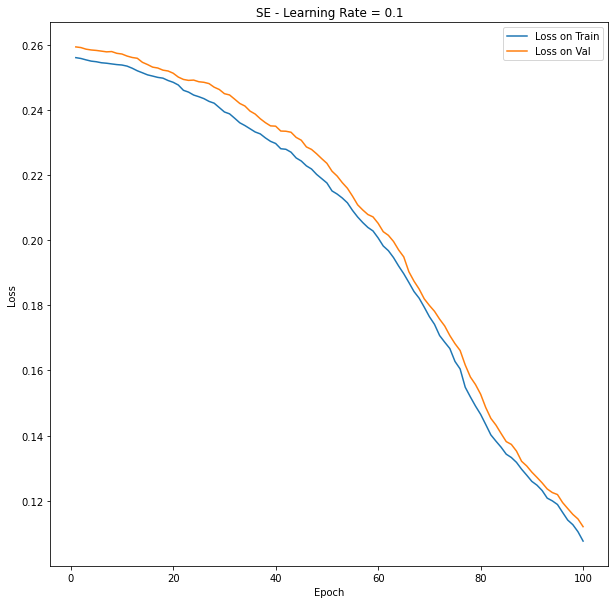

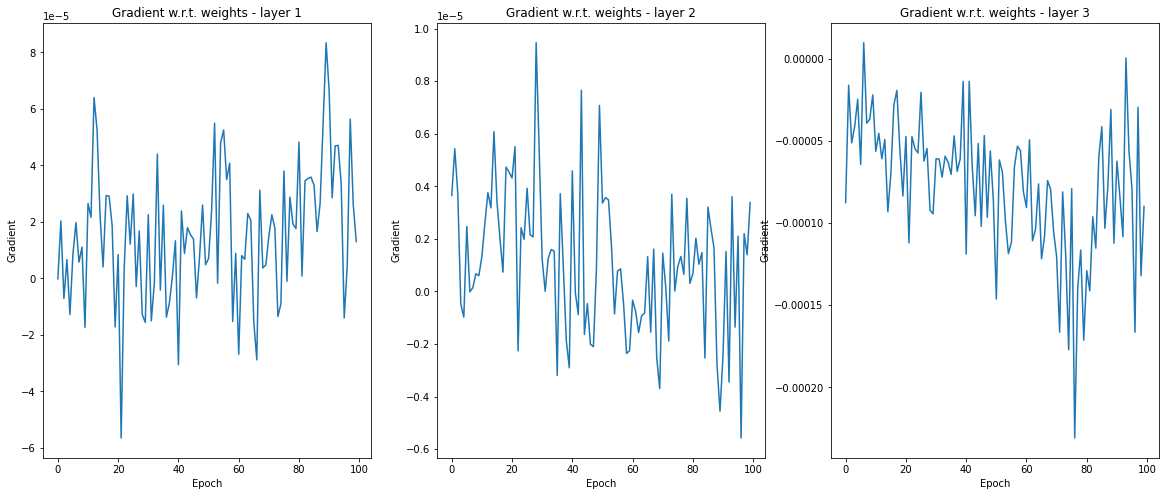

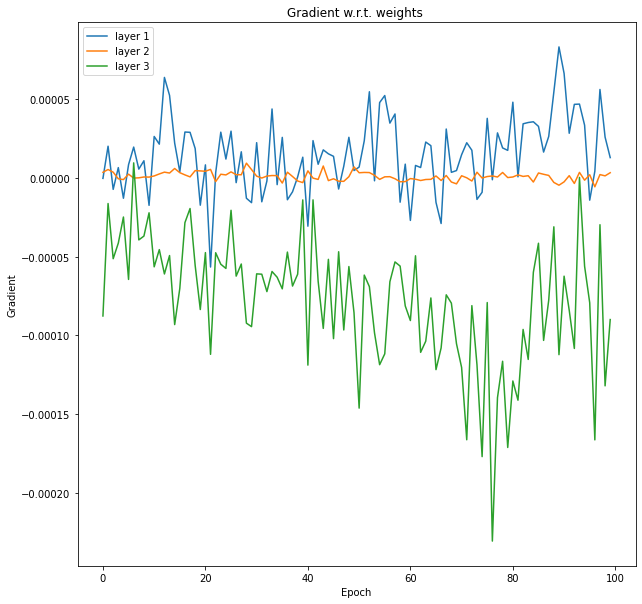

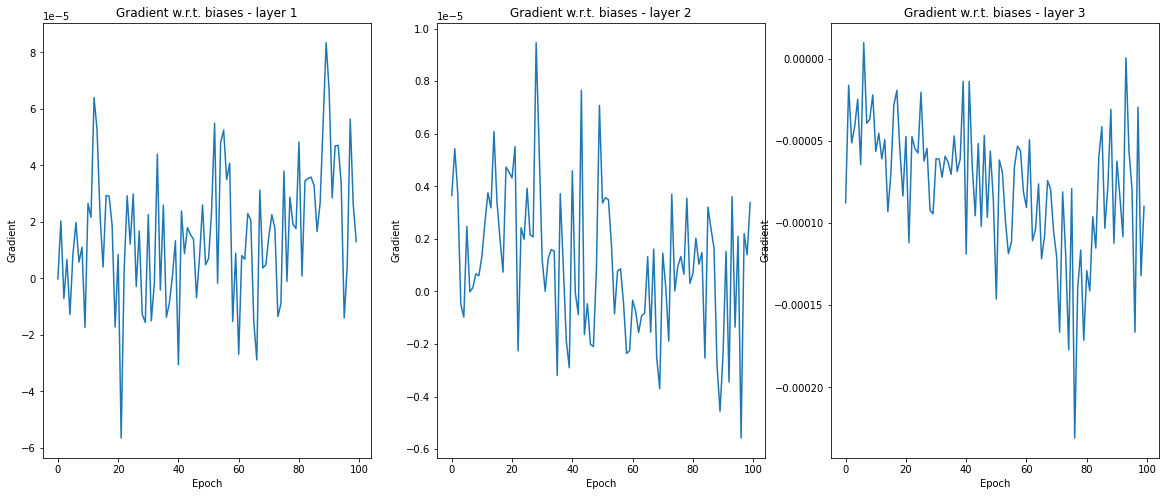

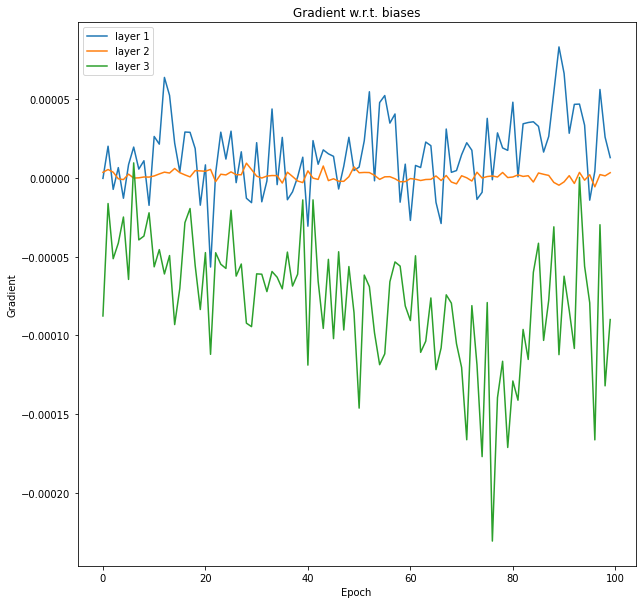



Model accuracy = 79.91 %



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


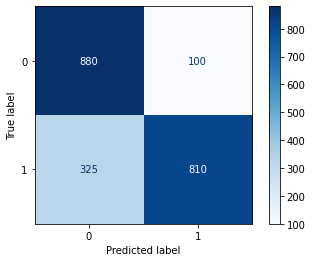


Label totals in dataset:
 [(0, 980), (1, 1135)]


In [67]:


neurons = [784, 200, 100, 1] # list of number of neurons in the layers sequentially.
activation_functions = ['stanh','stanh','sigmoid'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin_stanh = Neural_Network(neurons, activation_functions,initialization='randn',SEED=1000) 

losses = nn_bin_stanh.train(X_train_bin, Y_train_bin,patience=100,batch_size=None, lr=1e-1, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin,verbose=True, grad_show=True)
plot_conf(Y_test_bin,nn_bin_stanh.predict(X_test_bin))

Exploding gradient issue can be seen to a few degree in the above plot for stanh activation function. It varies for different random initialization. Weights and biases initialization has played some role in this behaviour.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


Epoch 5..............Loss on train = 0.26593959731543626, Loss on val = 0.2670746150809317
Epoch 10..............Loss on train = 0.26593959731543626, Loss on val = 0.2670746150809317
Epoch 15..............Loss on train = 0.26593959731543626, Loss on val = 0.2670746150809317
Epoch 20..............Loss on train = 0.26593959731543626, Loss on val = 0.2670746150809317
Epoch 25..............Loss on train = 0.26593959731543626, Loss on val = 0.2670746150809317
Epoch 30..............Loss on train = 0.26593959731543626, Loss on val = 0.2670746150809317
Epoch 35..............Loss on train = 0.26593959731543626, Loss on val = 0.2670746150809317
Epoch 40..............Loss on train = 0.26593959731543626, Loss on val = 0.2670746150809317
Epoch 45..............Loss on train = 0.26593959731543626, Loss on val = 0.2670746150809317
Epoch 50..............Loss on train = 0.26593959731543626, Loss on val = 0.2670746150809317
Epoch 55..............Loss on train = 0.26593959731543626, Loss on val = 0.267074

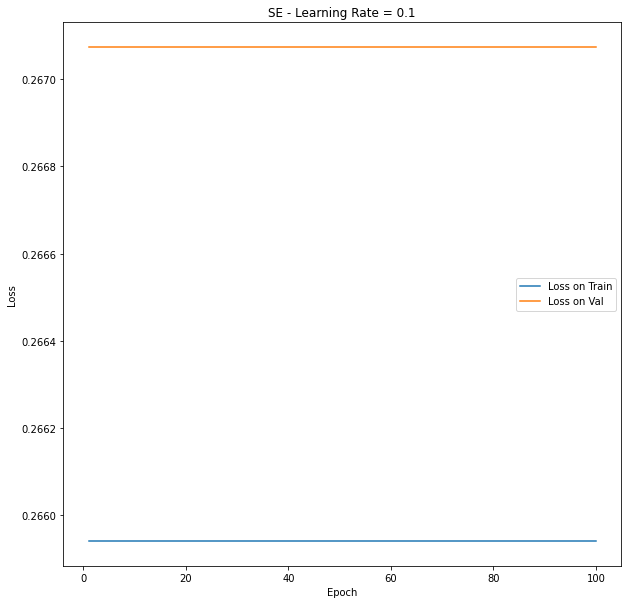

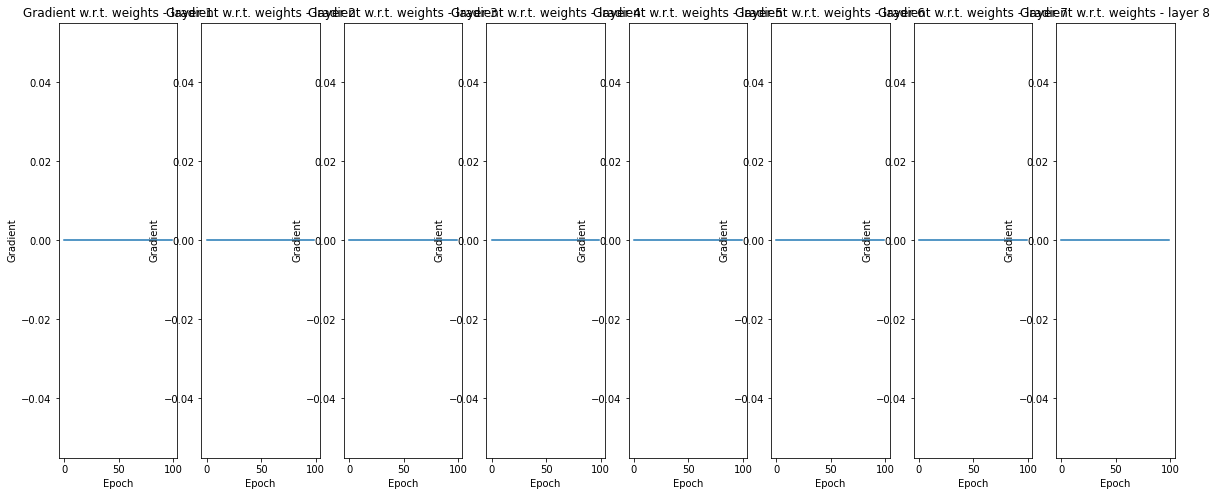

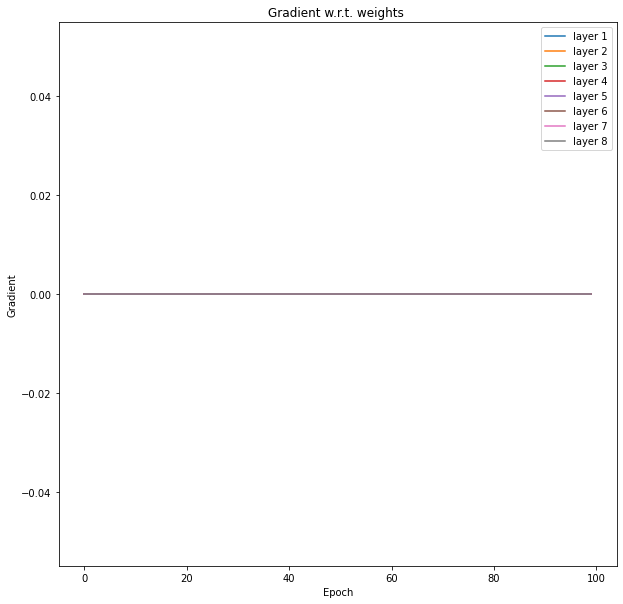

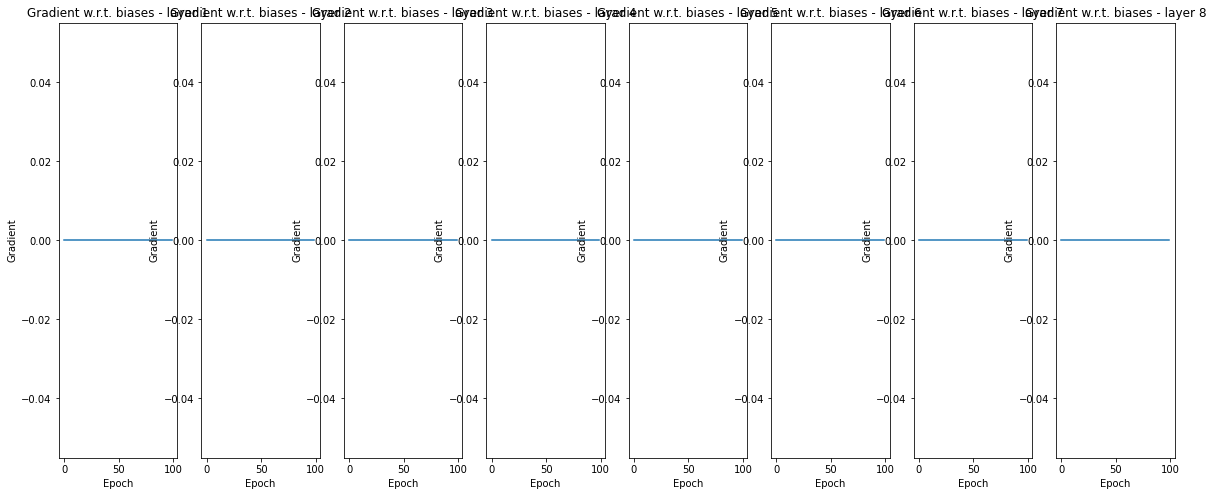

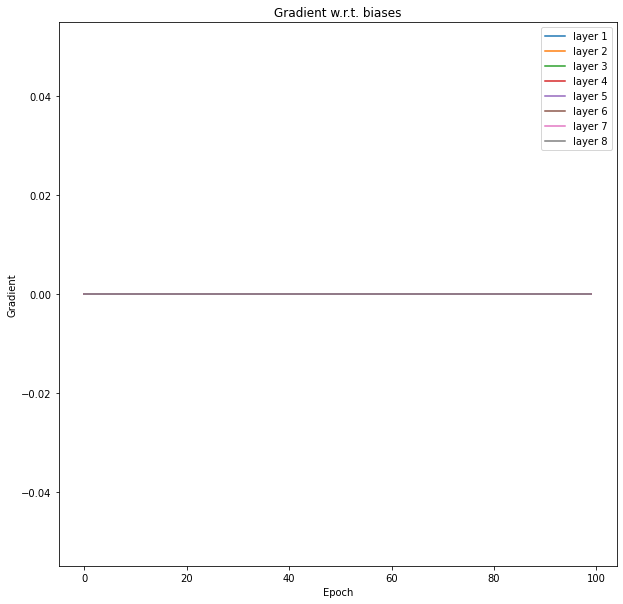



Model accuracy = 46.34 %



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


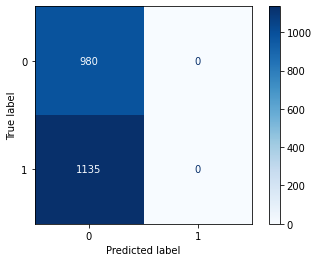


Label totals in dataset:
 [(0, 980), (1, 1135)]


In [68]:
neurons = [784, 200, 100,50,25, 1] # list of number of neurons in the layers sequentially.
activation_functions = ['stanh','stanh','stanh','stanh','sigmoid'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin_stanh = Neural_Network(neurons, activation_functions,initialization='randn',SEED=1000) 

losses = nn_bin_stanh.train(X_train_bin, Y_train_bin,patience=100,batch_size=None, lr=1e-1, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin,verbose=True, grad_show=True)
plot_conf(Y_test_bin,nn_bin_stanh.predict(X_test_bin))

Using many hidden layers causes vanishing gradient problem as shown above. stanh activation suffers the vanishing proplem more than the other two.

## Question 1. e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


Epoch 5..............Loss on train = 0.17843218626229795, Loss on val = 0.18130261209231446
Epoch 10..............Loss on train = 0.14847127447941744, Loss on val = 0.15865399619706932
Epoch 15..............Loss on train = 0.1329715045030031, Loss on val = 0.14159284313460696
Epoch 20..............Loss on train = 0.12060631271071881, Loss on val = 0.12670179969159434
Epoch 25..............Loss on train = 0.10911213164459815, Loss on val = 0.11394614290971868
Epoch 30..............Loss on train = 0.1025791003709206, Loss on val = 0.10421508027249542
Epoch 35..............Loss on train = 0.09648183061569432, Loss on val = 0.09999429169586742
Epoch 40..............Loss on train = 0.09151200244245747, Loss on val = 0.0941454237649319
Epoch 45..............Loss on train = 0.08586458601632152, Loss on val = 0.08852129510699806
Epoch 50..............Loss on train = 0.08149183211734011, Loss on val = 0.08187043643735625
Epoch 55..............Loss on train = 0.07733957030294093, Loss on val = 0

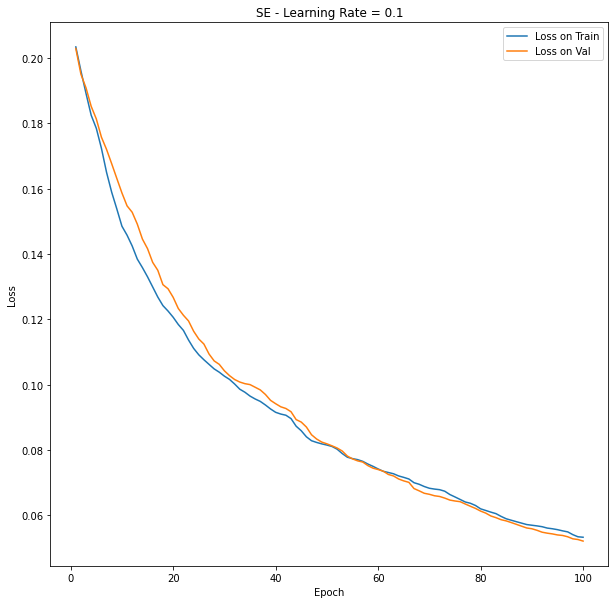

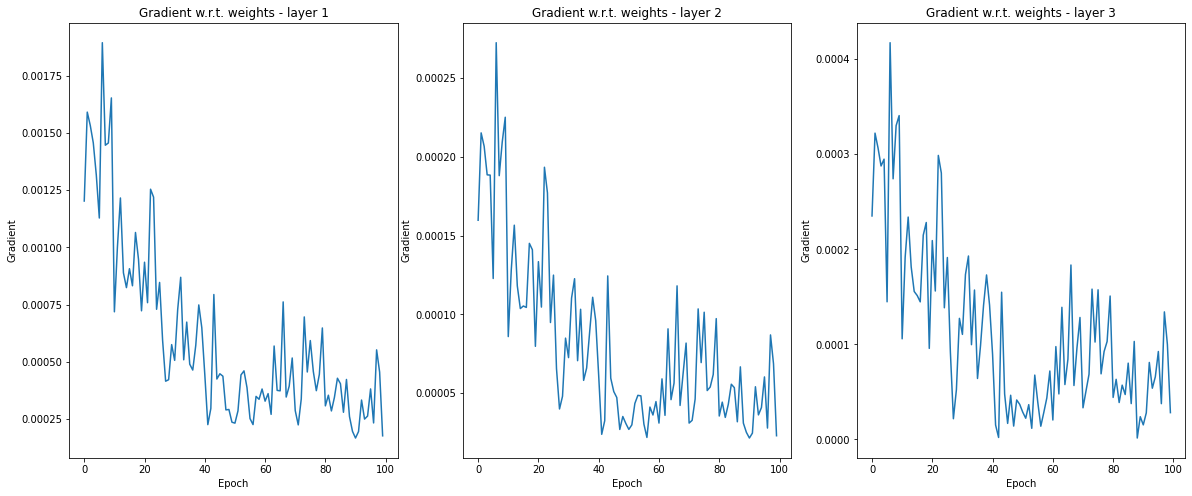

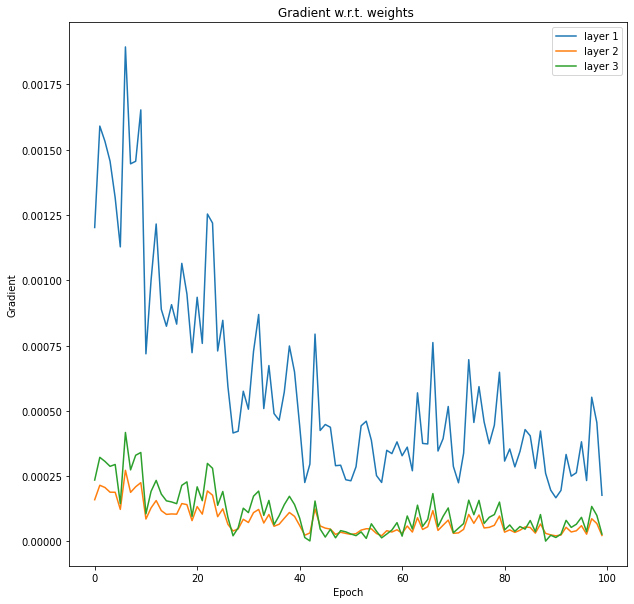

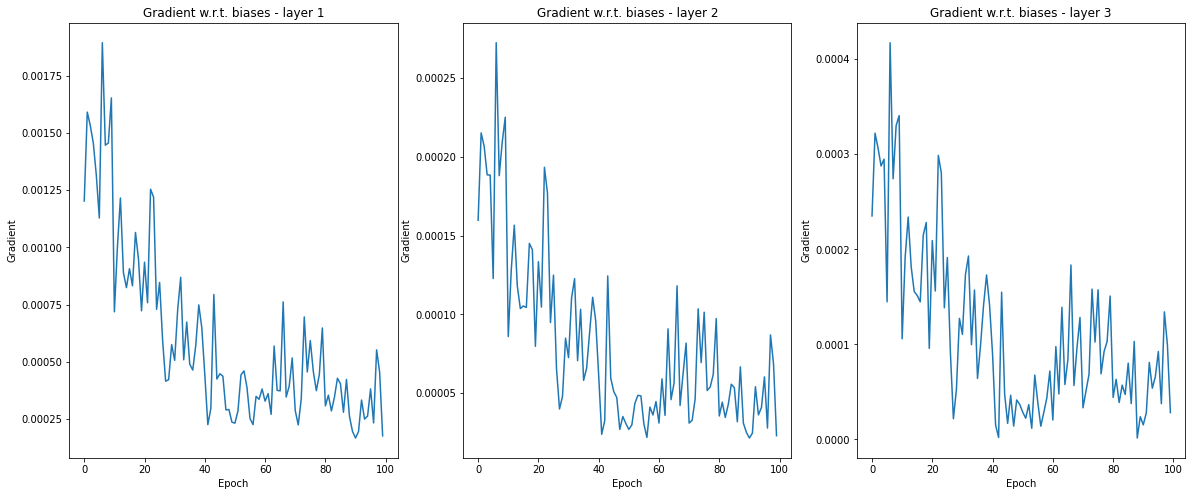

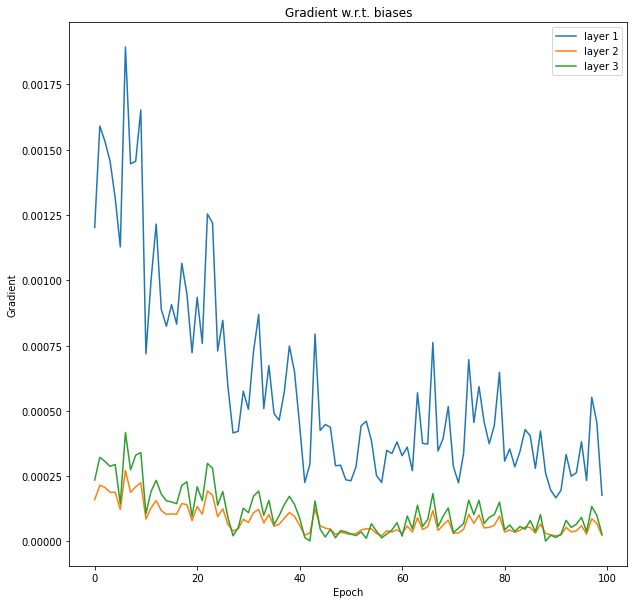



Model accuracy = 89.83 %



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


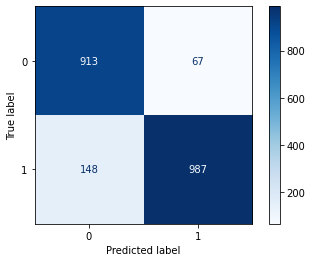


Label totals in dataset:
 [(0, 980), (1, 1135)]


In [80]:
neurons = [784, 200, 100, 1] # list of number of neurons in the layers sequentially.
activation_functions = ['arelu','arelu','sigmoid'] # activations in each layer (Note: the input layer does not have any activation

nn_bin_arelu = Neural_Network(neurons, activation_functions,initialization='randn',SEED=1000) 

losses = nn_bin_arelu.train(X_train_bin, Y_train_bin, patience=100, batch_size=None, lr=1e-1, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin,verbose=True, grad_show=True)
plot_conf(Y_test_bin,nn_bin_arelu.predict(X_test_bin))

Although previous layers (L1) have more mean gradient than the outer layer (towards output), it doesn't show much of a problem. Exploding gradient problem can arise if proper care is not given for arelu.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


Epoch 5..............Loss on train = 0.18041582477412624, Loss on val = 0.1797303327780957
Epoch 10..............Loss on train = 0.1395984531674324, Loss on val = 0.1378378924193187
Epoch 15..............Loss on train = 0.09379826120852526, Loss on val = 0.08946953214272675
Epoch 20..............Loss on train = 0.06588469521893328, Loss on val = 0.06627501743328817
Epoch 25..............Loss on train = 0.05291843261817667, Loss on val = 0.05112836767707716
Epoch 30..............Loss on train = 0.04149804375109522, Loss on val = 0.0393244941865289
Epoch 35..............Loss on train = 0.035285541821692745, Loss on val = 0.03534265178605271
Epoch 40..............Loss on train = 0.029231839285274328, Loss on val = 0.02864869183661288
Epoch 45..............Loss on train = 0.026306926203417236, Loss on val = 0.025661267423792374
Epoch 50..............Loss on train = 0.023633422940026245, Loss on val = 0.023004143731394696
Epoch 55..............Loss on train = 0.02101896472784599, Loss on va

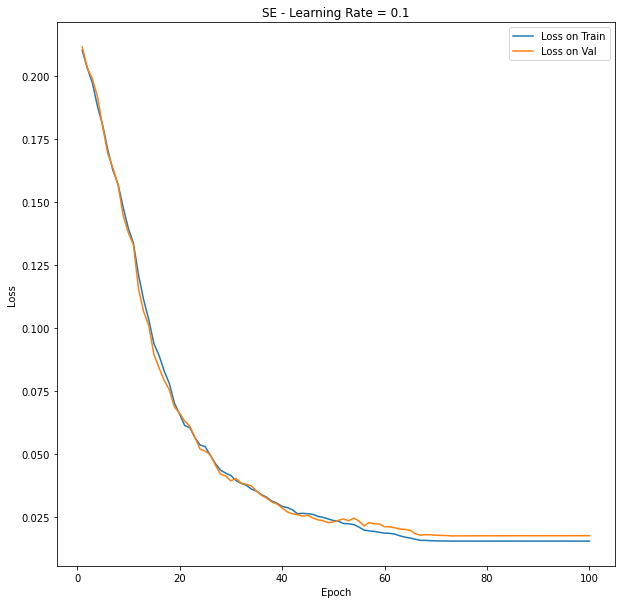

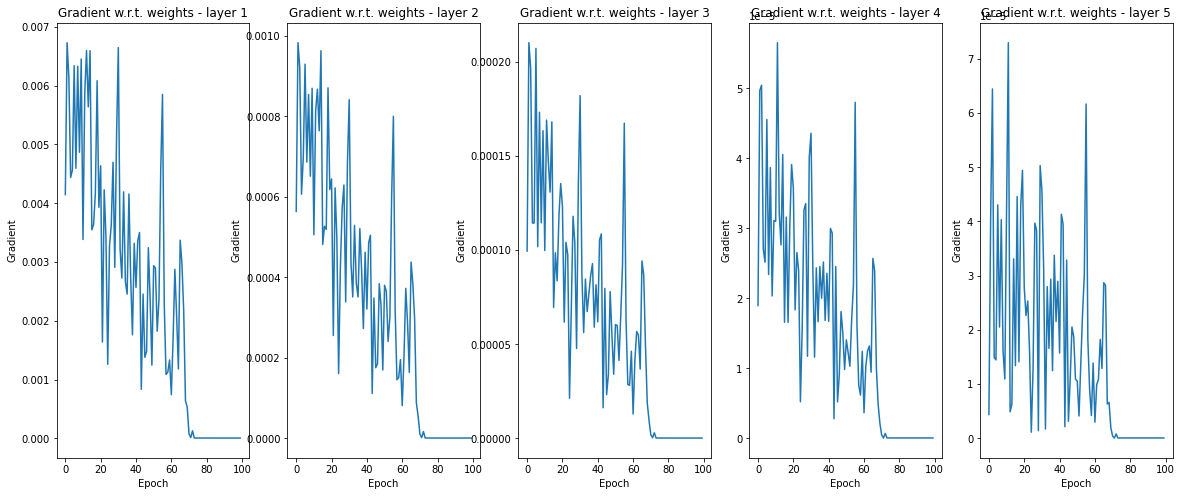

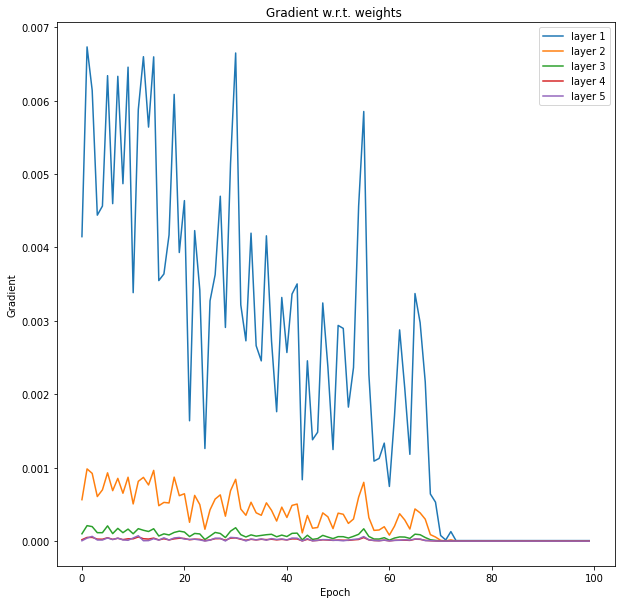

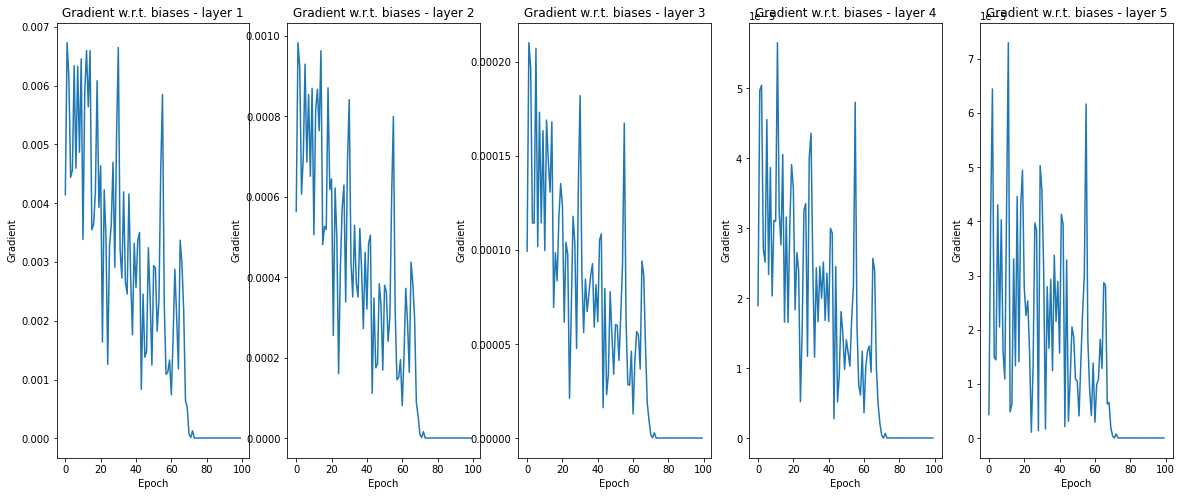

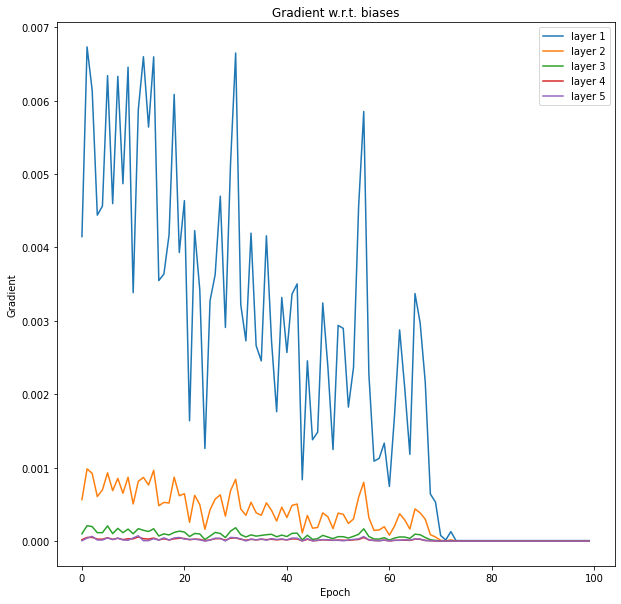



Model accuracy = 97.21 %



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


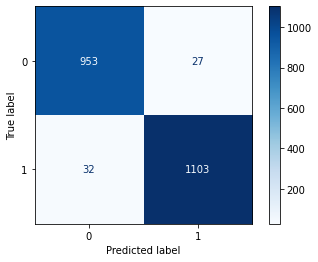


Label totals in dataset:
 [(0, 980), (1, 1135)]


In [81]:
neurons = [784, 200, 100,50,25, 1] # list of number of neurons in the layers sequentially.
activation_functions = ['arelu','arelu','arelu','arelu','sigmoid'] # activations in each layer (Note: the input layer does not have any activation

nn_bin_arelu = Neural_Network(neurons, activation_functions,initialization='randn',SEED=1000) 

losses = nn_bin_arelu.train(X_train_bin, Y_train_bin, patience=100, batch_size=None, lr=1e-1, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin,verbose=True, grad_show=True)
plot_conf(Y_test_bin,nn_bin_arelu.predict(X_test_bin))

Vanishing gradient issue is not present in arelu as in stanh. arelu can be a good activation whenever one faces vanishing gradient issue.

## Question 1.f

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


Epoch 5..............Loss on train = 0.1973660730466619, Loss on val = 0.1966906029976107
Epoch 10..............Loss on train = 0.17405823796161757, Loss on val = 0.17506560941995764
Epoch 15..............Loss on train = 0.1497175867414008, Loss on val = 0.15518252463964924
Epoch 20..............Loss on train = 0.13671075291906531, Loss on val = 0.14327144233360137
Epoch 25..............Loss on train = 0.12277734290130592, Loss on val = 0.12680787528543308
Epoch 30..............Loss on train = 0.11318548879039717, Loss on val = 0.1162317321628012
Epoch 35..............Loss on train = 0.10434259626478358, Loss on val = 0.10838893173821484
Epoch 40..............Loss on train = 0.09657577055394176, Loss on val = 0.09872518791893431
Epoch 45..............Loss on train = 0.09004869027363137, Loss on val = 0.09106231070072245
Epoch 50..............Loss on train = 0.08513082035157221, Loss on val = 0.08480559521073515
Epoch 55..............Loss on train = 0.08115222272896604, Loss on val = 0.

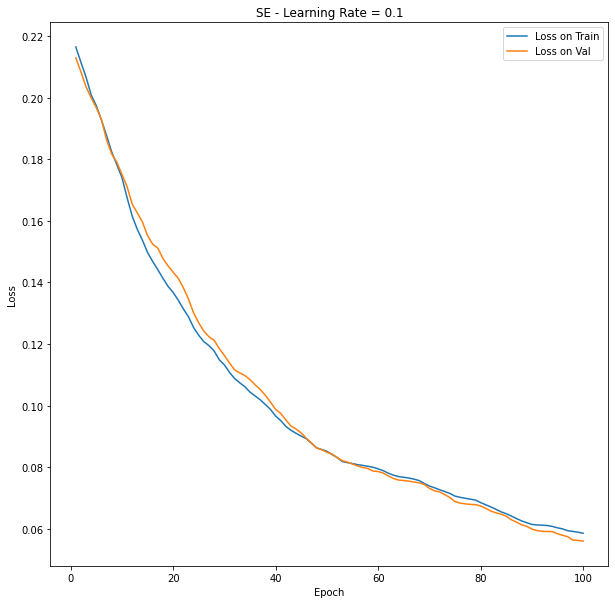

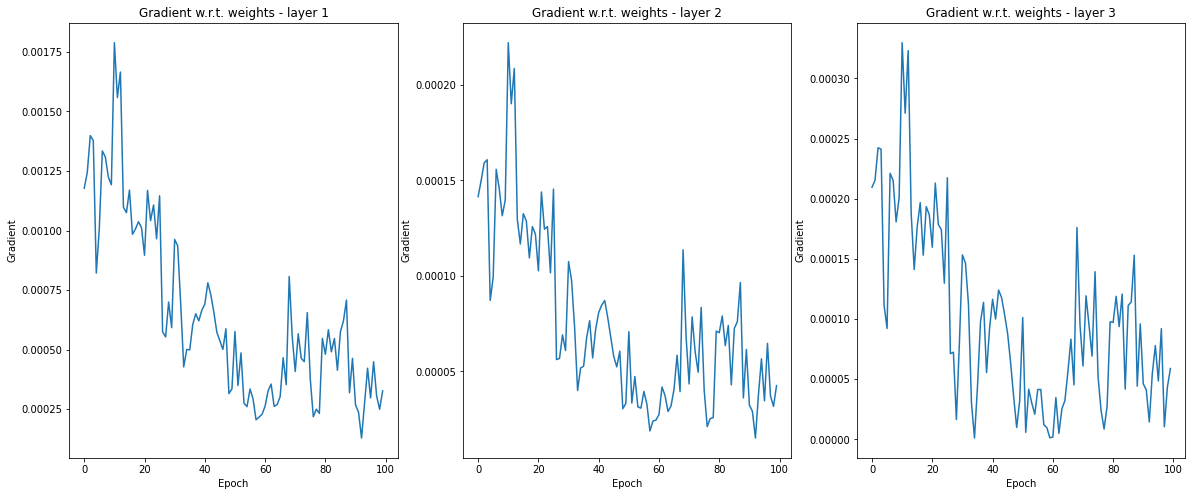

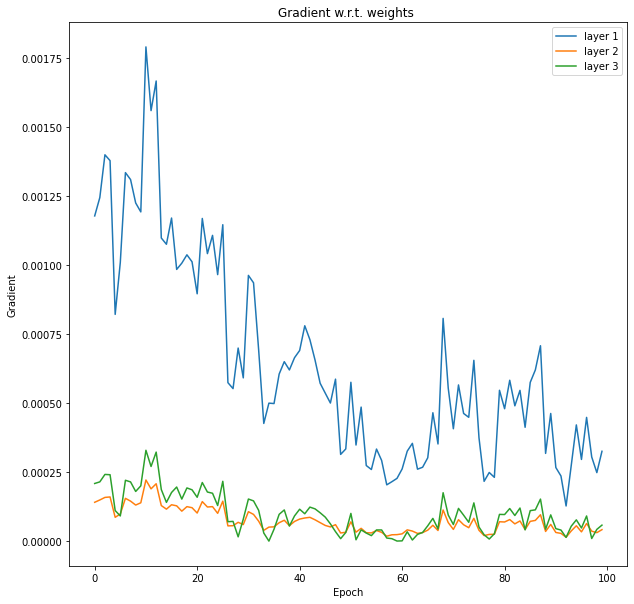

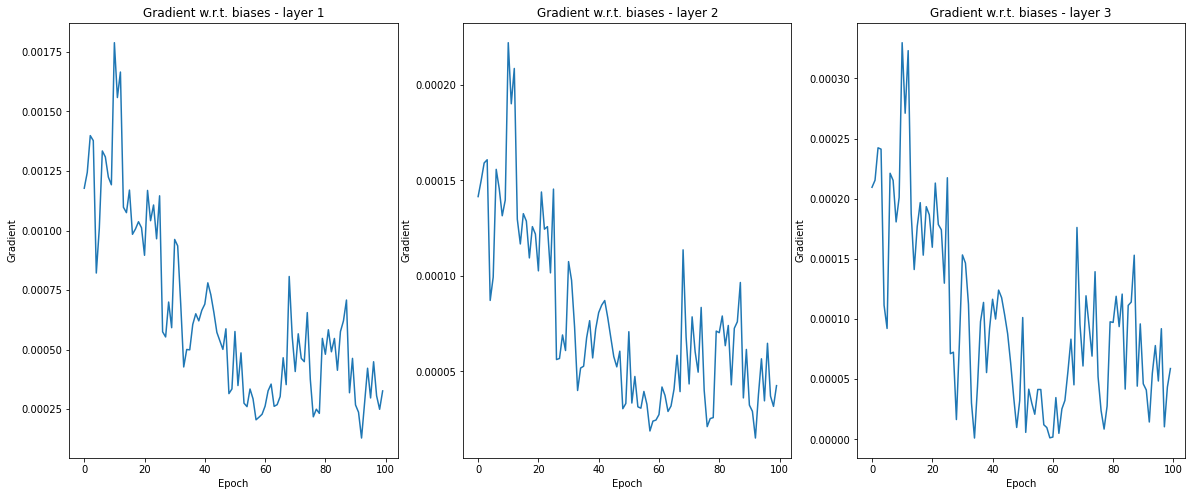

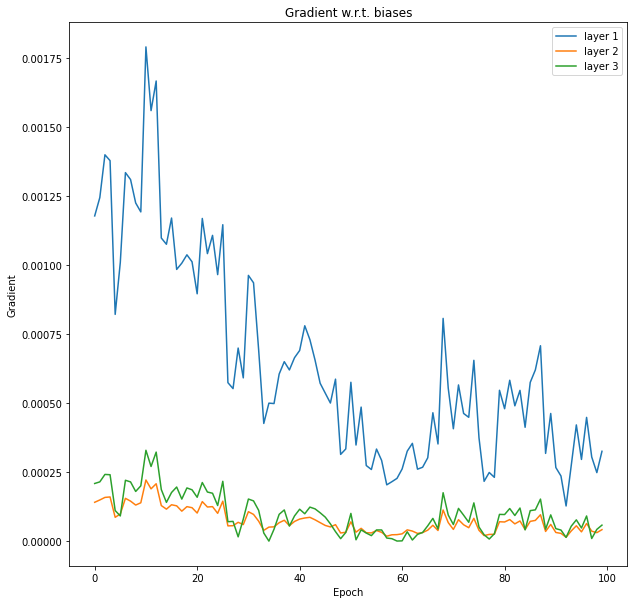



Model accuracy = 89.46 %



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


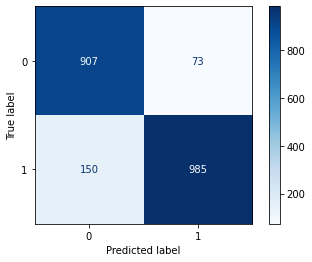


Label totals in dataset:
 [(0, 980), (1, 1135)]


In [82]:
neurons = [784, 200, 100, 1] # list of number of neurons in the layers sequentially.
activation_functions = ['exu','exu','sigmoid'] # activations in each layer (Note: the input layer does not have any activation


nn_bin_exu = Neural_Network(neurons, activation_functions,initialization='randn',SEED=1000) 

losses = nn_bin_exu.train(X_train_bin, Y_train_bin, patience=100, batch_size=None, lr=1e-1, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin, verbose=True, grad_show=True)
plot_conf(Y_test_bin,nn_bin_exu.predict(X_test_bin))

The variation in gradient is uniform in exu. They are following their shape. This might suggest that exu is better than arelu as well. Like previous two, a bit of high gradient is there for layer L1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


Epoch 5..............Loss on train = 0.1946794549422582, Loss on val = 0.19616574857944144
Epoch 10..............Loss on train = 0.14947825648757604, Loss on val = 0.14658454424655726
Epoch 15..............Loss on train = 0.10014709297628675, Loss on val = 0.10132959443022538
Epoch 20..............Loss on train = 0.08470019508398985, Loss on val = 0.08329435170352166
Epoch 25..............Loss on train = 0.06359723665573463, Loss on val = 0.061963765352398094
Epoch 30..............Loss on train = 0.04804149441200041, Loss on val = 0.046783564214865146
Epoch 35..............Loss on train = 0.04164306780961641, Loss on val = 0.04161422442383142
Epoch 40..............Loss on train = 0.03534965105741493, Loss on val = 0.036088113318225166
Epoch 45..............Loss on train = 0.02997291099165073, Loss on val = 0.030949047352939026
Epoch 50..............Loss on train = 0.02672842827266939, Loss on val = 0.02640292229586722
Epoch 55..............Loss on train = 0.025119248275963017, Loss on 

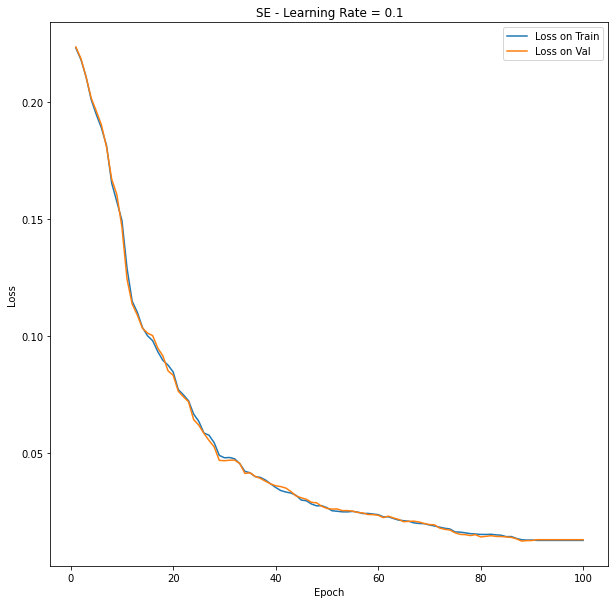

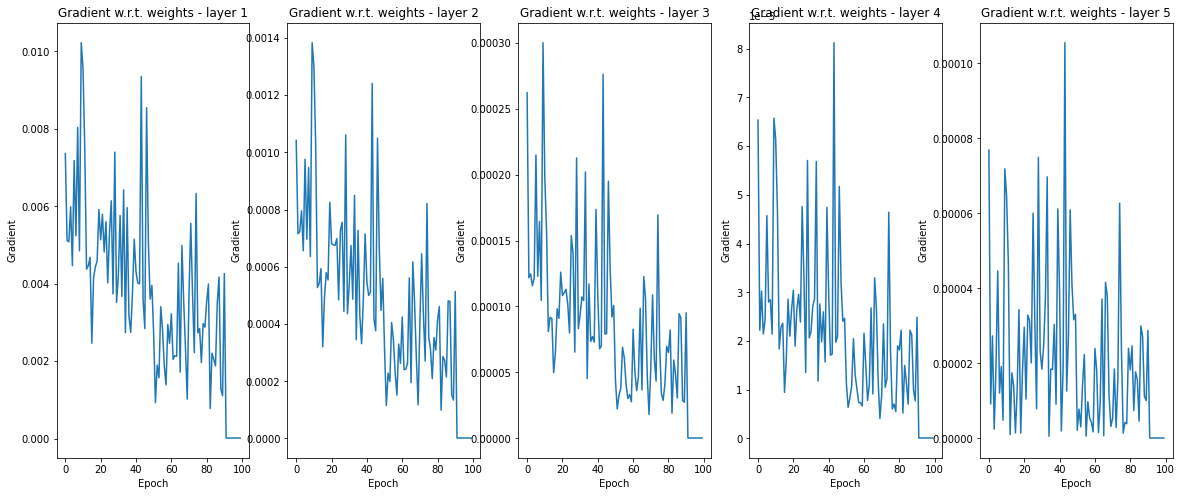

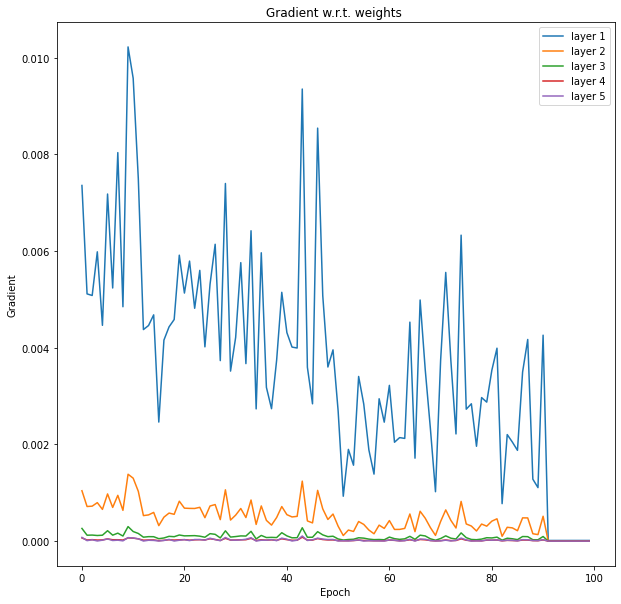

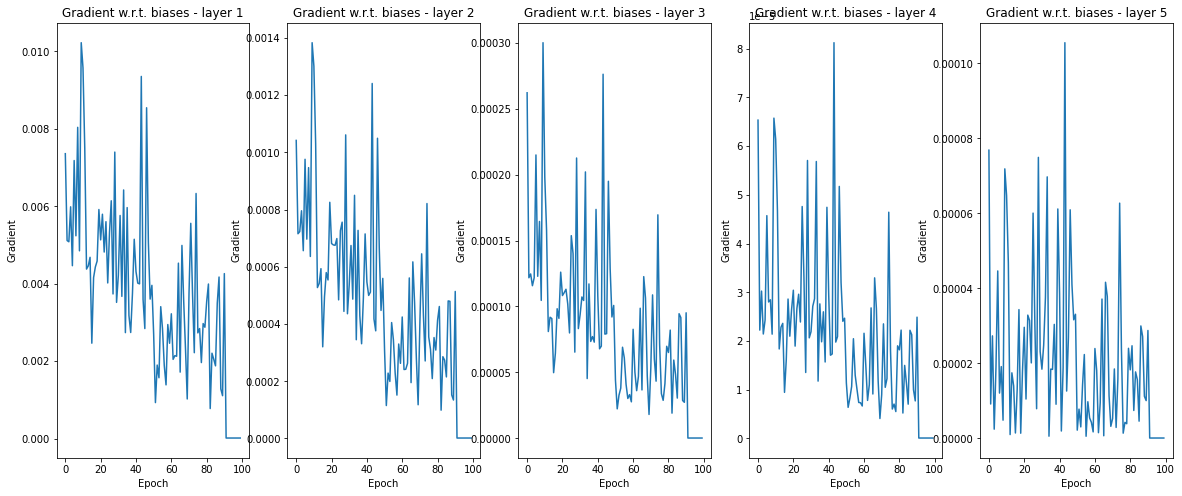

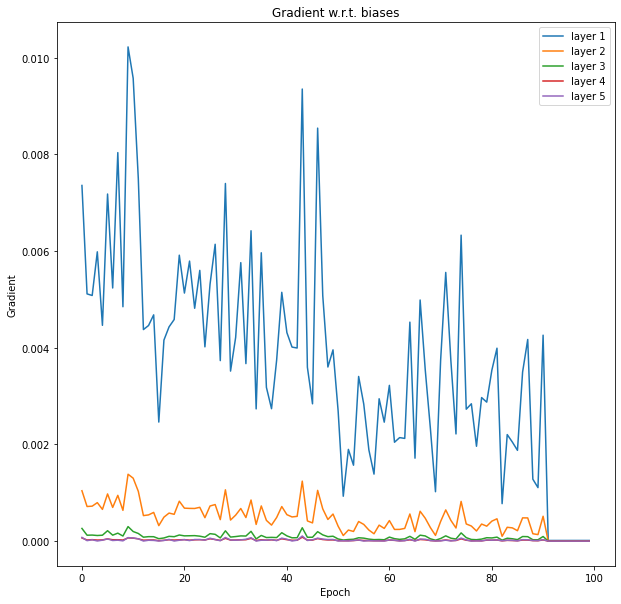



Model accuracy = 97.35 %



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


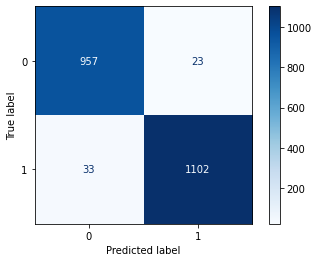


Label totals in dataset:
 [(0, 980), (1, 1135)]


In [83]:
neurons = [784, 200, 100,50,25, 1] # list of number of neurons in the layers sequentially.
activation_functions = ['exu','exu','exu','exu','sigmoid'] # activations in each layer (Note: the input layer does not have any activation


nn_bin_exu = Neural_Network(neurons, activation_functions,initialization='randn',SEED=1000) 

losses = nn_bin_exu.train(X_train_bin, Y_train_bin, patience=100, batch_size=None, lr=1e-1, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin, verbose=True, grad_show=True)
plot_conf(Y_test_bin,nn_bin_exu.predict(X_test_bin))

exu doesn't seem to suffer from vanishing gradient issue. It is a good substitute for arelu.

## Question 1.g, Comparison

Plot of mean gradient weights and biases for successive layers show vanishing gradient problem for STANH. 
EXU can be thought to have a bit of exploding gradient tendency, though it can be prevented. 
ARELU has similar behaviour like EXU but doesn't show correlation among weights and biases shape as found in EXU.

## Question 1.h

Epoch 5..............Loss on train = 124734.32634228189, Loss on val = 124733.19245953416


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:349: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:350: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in multiply


Epoch 10..............Loss on train = nan, Loss on val = nan
Epoch 15..............Loss on train = nan, Loss on val = nan
Epoch 20..............Loss on train = nan, Loss on val = nan
Epoch 25..............Loss on train = nan, Loss on val = nan
Epoch 30..............Loss on train = nan, Loss on val = nan
Epoch 35..............Loss on train = nan, Loss on val = nan
Epoch 40..............Loss on train = nan, Loss on val = nan
Epoch 45..............Loss on train = nan, Loss on val = nan
Epoch 50..............Loss on train = nan, Loss on val = nan
Epoch 55..............Loss on train = nan, Loss on val = nan
Epoch 60..............Loss on train = nan, Loss on val = nan
Epoch 65..............Loss on train = nan, Loss on val = nan
Epoch 70..............Loss on train = nan, Loss on val = nan
Epoch 75..............Loss on train = nan, Loss on val = nan
Epoch 80..............Loss on train = nan, Loss on val = nan
Epoch 85..............Loss on train = nan, Loss on val = nan
Epoch 90..............Lo

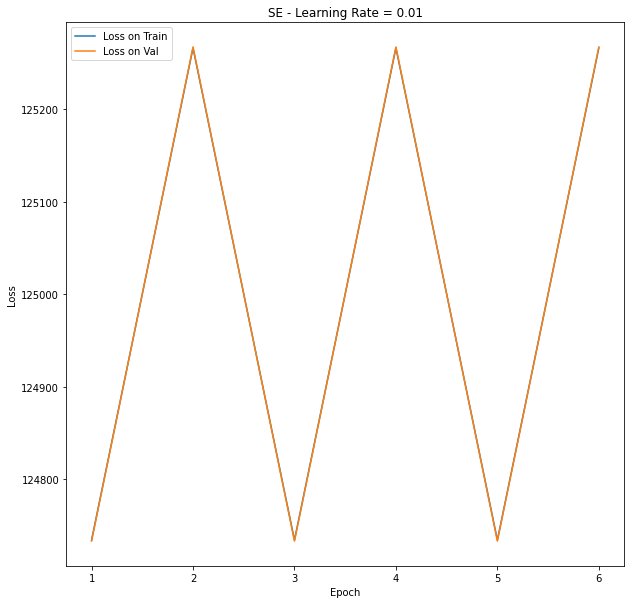

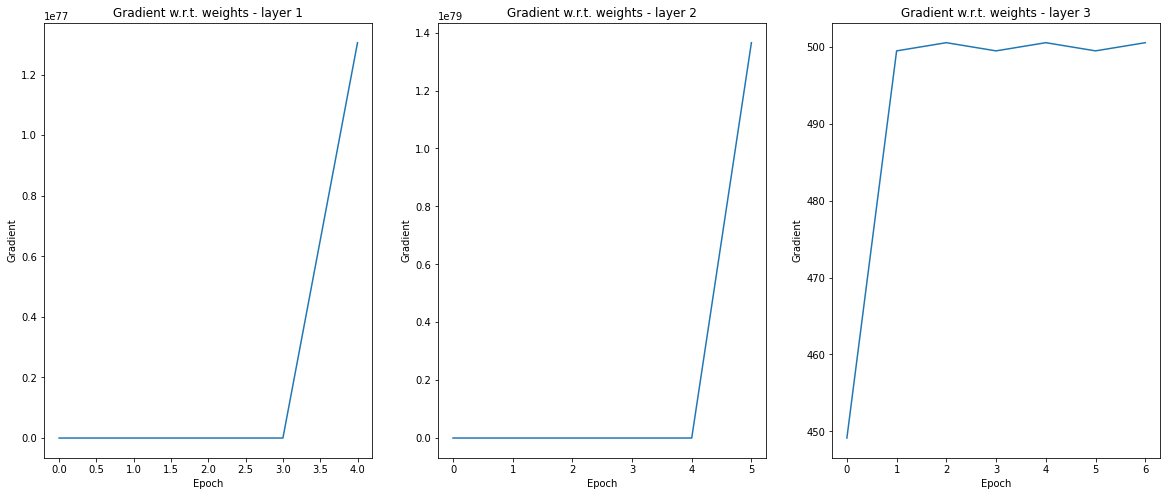

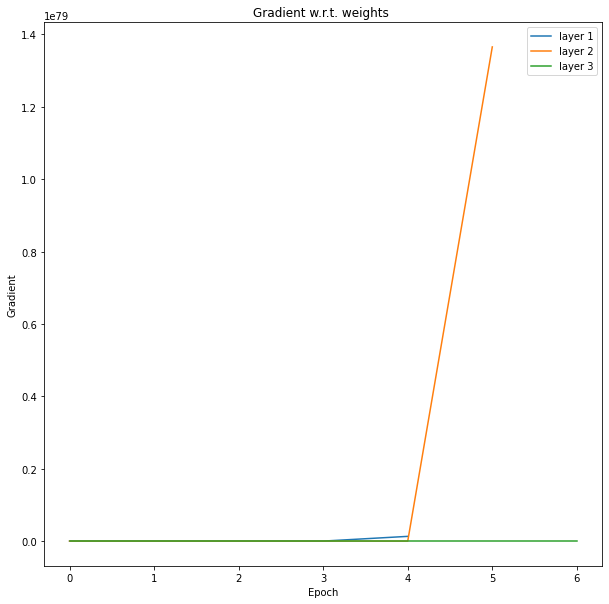

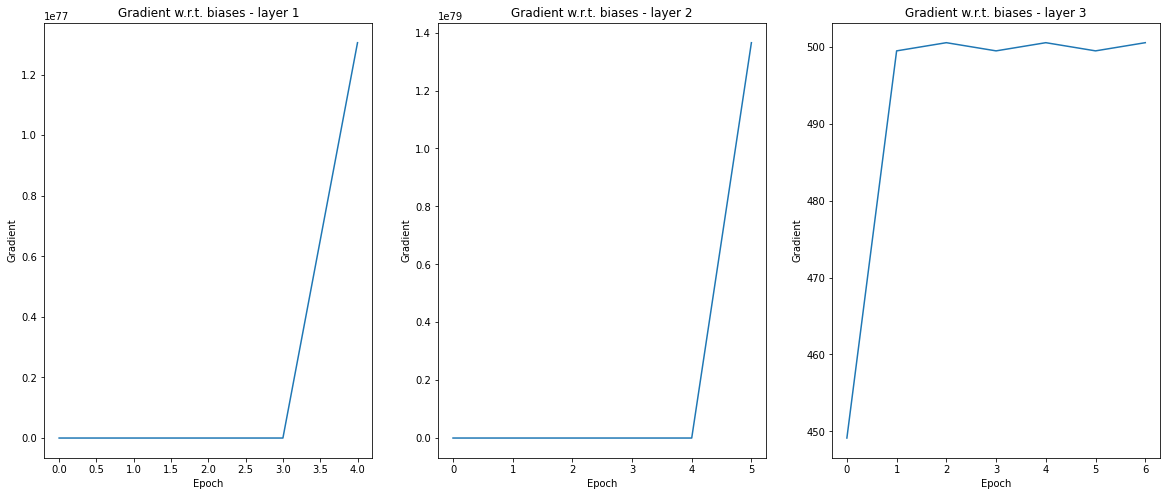

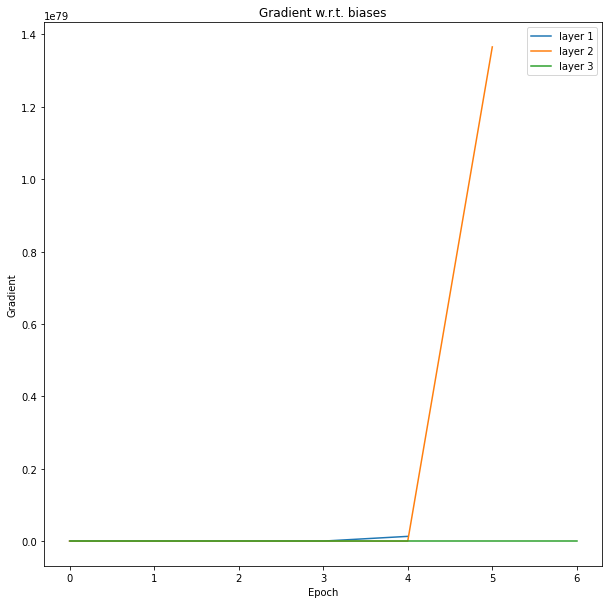



Model accuracy = 53.66 %



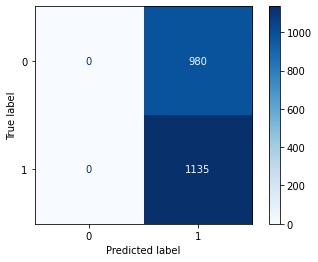


Label totals in dataset:
 [(0, 980), (1, 1135)]


In [93]:


neurons = [784, 200, 100, 1] # list of number of neurons in the layers sequentially.
activation_functions = ['stanh','stanh','linear'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin_stanh = Neural_Network(neurons, activation_functions,initialization='randn',SEED=1000) 

losses = nn_bin_stanh.train(X_train_bin, Y_train_bin,patience=100,batch_size=None, lr=1e-2, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin,verbose=True, grad_show=True)
plot_conf(Y_test_bin,nn_bin_stanh.predict(X_test_bin))

Epoch 5..............Loss on train = 124734.32634228189, Loss on val = 124733.19245953416
Epoch 10..............Loss on train = 125266.20553691275, Loss on val = 125267.34168969601
Epoch 15..............Loss on train = 125266.20553691275, Loss on val = 125267.34168969601
Epoch 20..............Loss on train = 124734.32634228189, Loss on val = 124733.19245953416
Epoch 25..............Loss on train = 125266.20553691275, Loss on val = 125267.34168969601
Epoch 30..............Loss on train = 124734.32634228189, Loss on val = 124733.19245953416
Epoch 35..............Loss on train = 125266.20553691275, Loss on val = 125267.34168969601
Epoch 40..............Loss on train = 124734.32634228189, Loss on val = 124733.19245953416
Epoch 45..............Loss on train = 125266.20553691275, Loss on val = 125267.34168969601
Epoch 50..............Loss on train = 124734.32634228189, Loss on val = 124733.19245953416
Epoch 55..............Loss on train = 125266.20553691275, Loss on val = 125267.34168969601


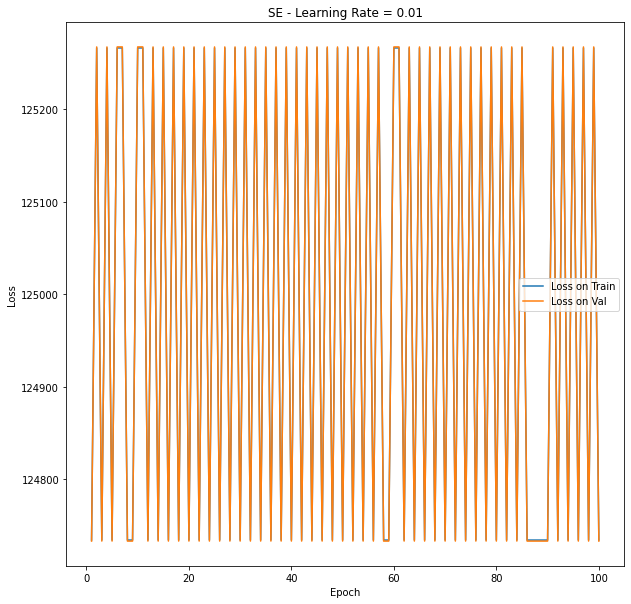

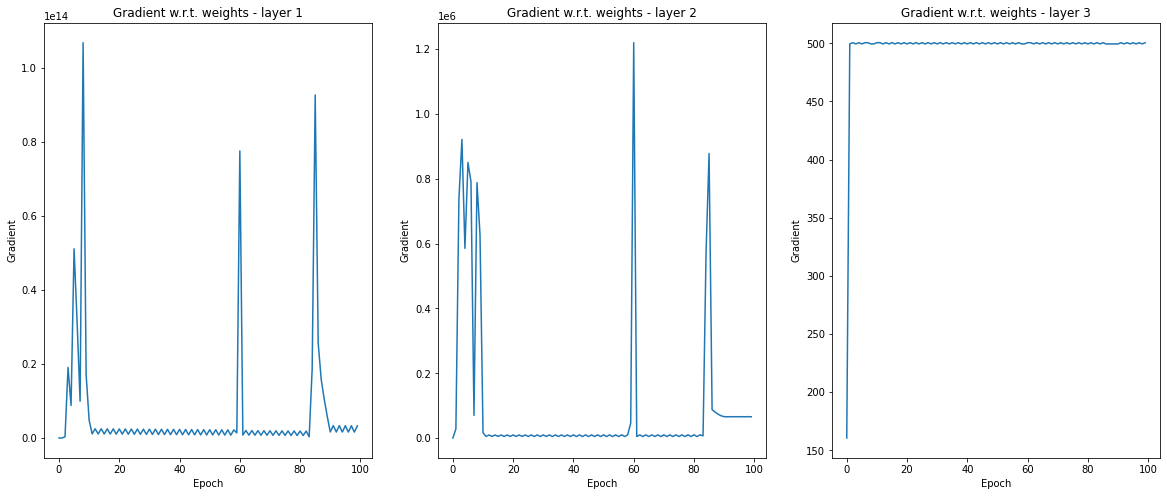

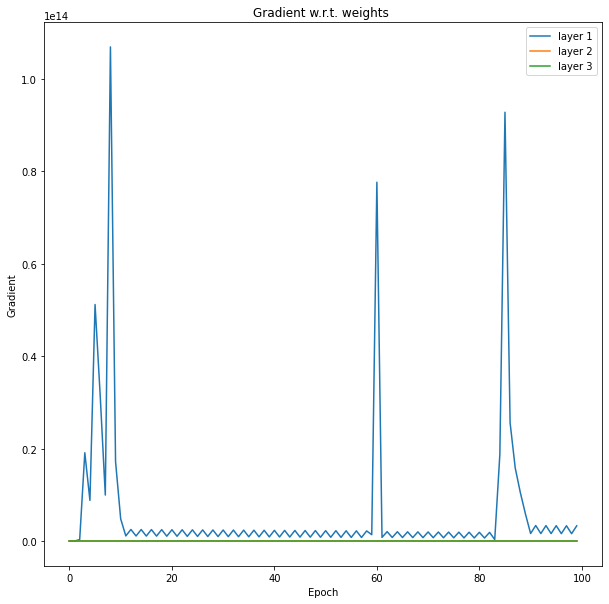

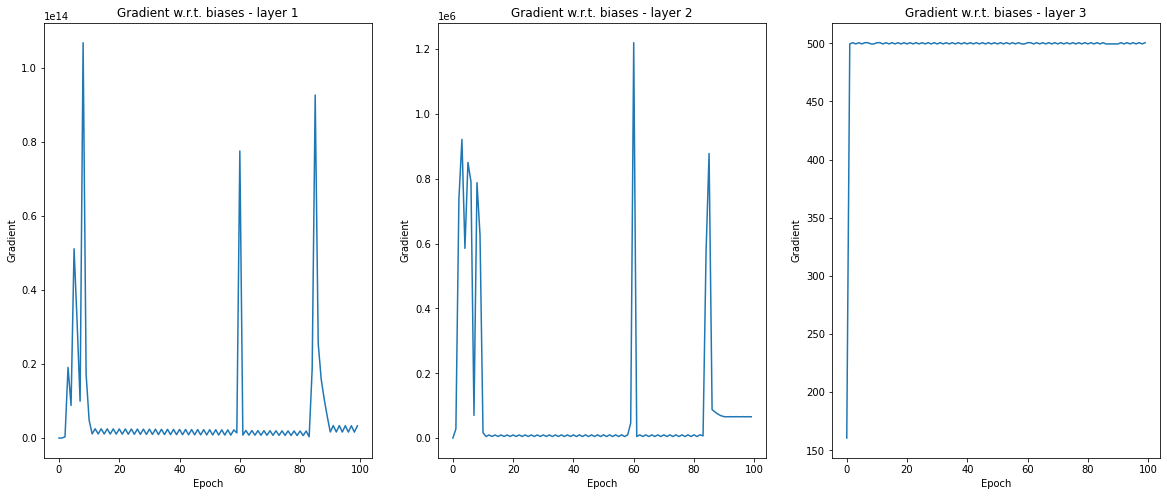

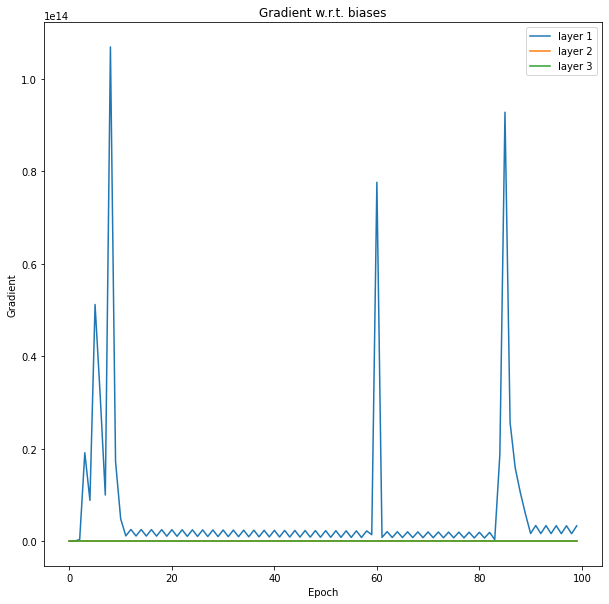



Model accuracy = 53.66 %



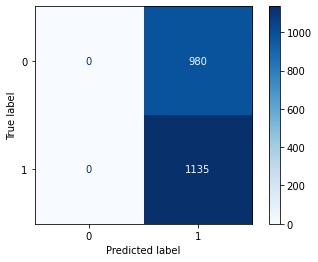


Label totals in dataset:
 [(0, 980), (1, 1135)]


In [92]:
neurons = [784, 200, 100, 1] # list of number of neurons in the layers sequentially.
activation_functions = ['arelu','arelu','linear'] # activations in each layer (Note: the input layer does not have any activation

nn_bin_arelu = Neural_Network(neurons, activation_functions,initialization='randn',SEED=1000) 

losses = nn_bin_arelu.train(X_train_bin, Y_train_bin, patience=100, batch_size=None, lr=1e-2, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin,verbose=True, grad_show=True)
plot_conf(Y_test_bin,nn_bin_arelu.predict(X_test_bin))

Epoch 5..............Loss on train = 124734.32634228189, Loss on val = 124733.19245953416
Epoch 10..............Loss on train = 125266.20553691275, Loss on val = 125267.34168969601
Epoch 15..............Loss on train = 124734.32634228189, Loss on val = 124733.19245953416
Epoch 20..............Loss on train = 125266.20553691275, Loss on val = 125267.34168969601
Epoch 25..............Loss on train = 124734.32634228189, Loss on val = 124733.19245953416
Epoch 30..............Loss on train = 125266.20553691275, Loss on val = 125267.34168969601
Epoch 35..............Loss on train = 124734.32634228189, Loss on val = 124733.19245953416
Epoch 40..............Loss on train = 125266.20553691275, Loss on val = 125267.34168969601
Epoch 45..............Loss on train = 124734.32634228189, Loss on val = 124733.19245953416
Epoch 50..............Loss on train = 125266.20553691275, Loss on val = 125267.34168969601
Epoch 55..............Loss on train = 124734.32634228189, Loss on val = 124733.19245953416


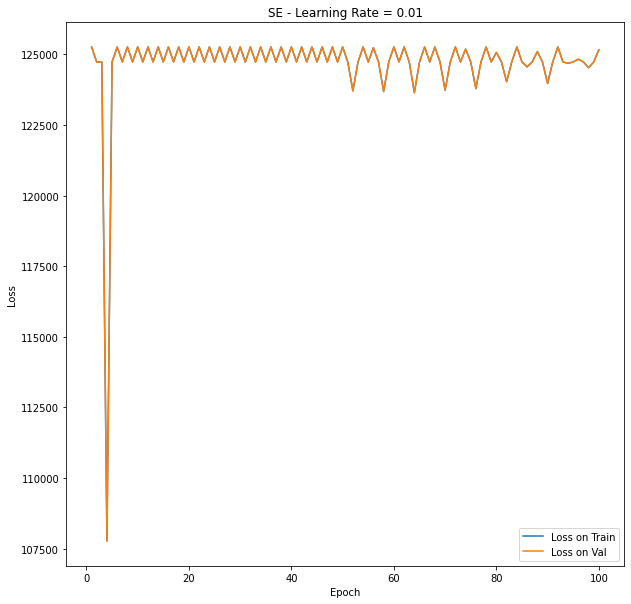

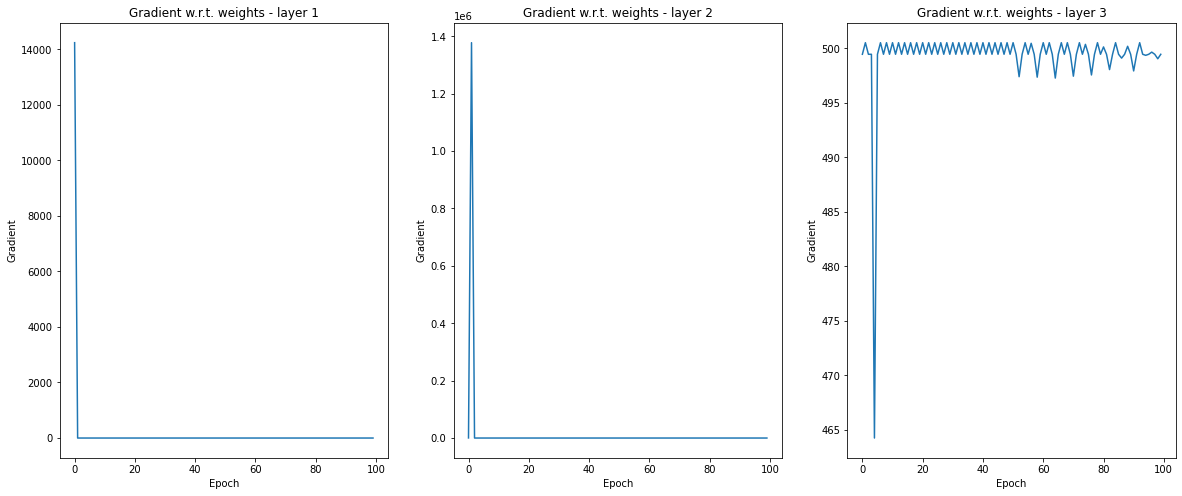

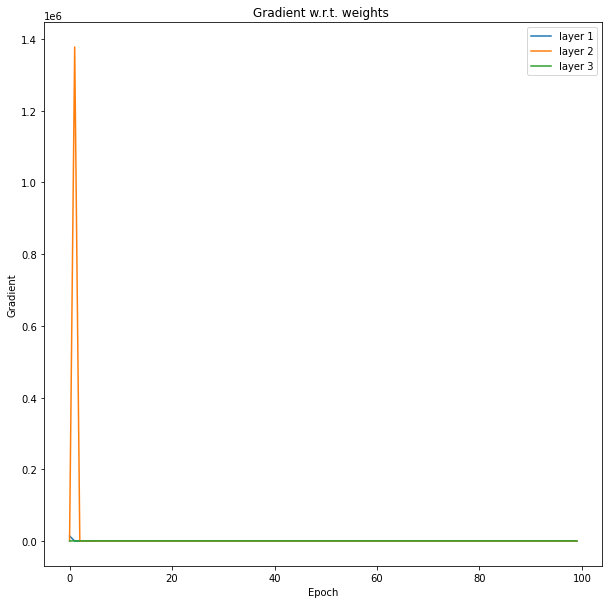

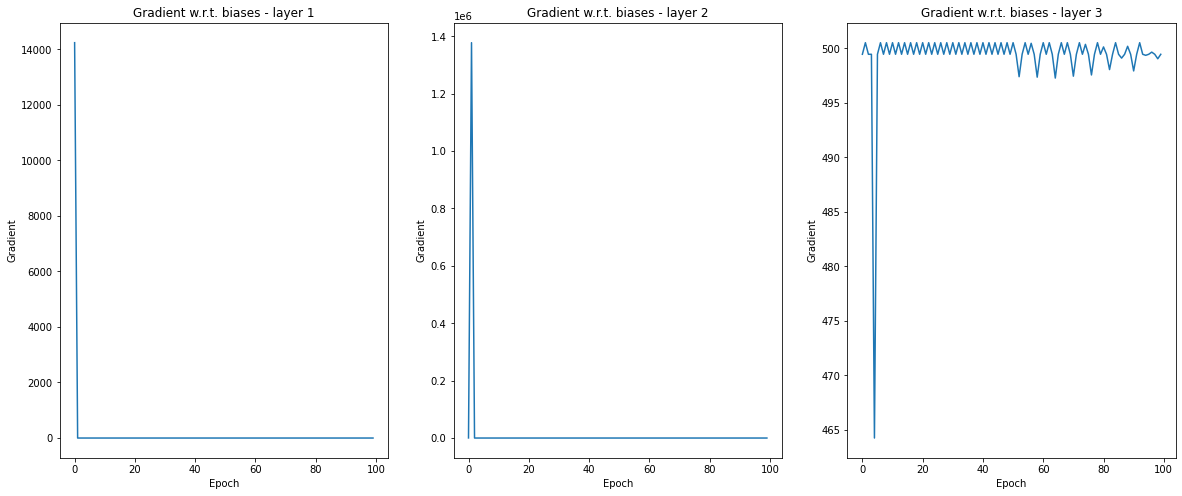

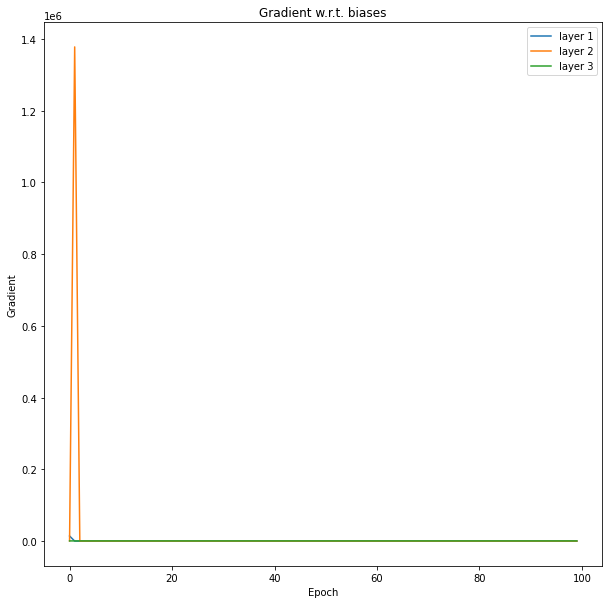



Model accuracy = 46.34 %



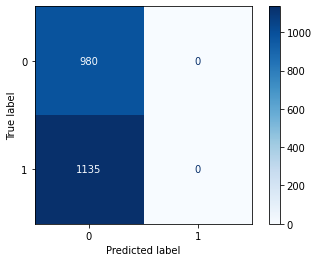


Label totals in dataset:
 [(0, 980), (1, 1135)]


In [91]:
neurons = [784, 200, 100, 1] # list of number of neurons in the layers sequentially.
activation_functions = ['exu','exu','linear'] # activations in each layer (Note: the input layer does not have any activation


nn_bin_exu = Neural_Network(neurons, activation_functions,initialization='rand',SEED=1000) 

losses = nn_bin_exu.train(X_train_bin, Y_train_bin, patience=100, batch_size=None, lr=1e-2, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin, verbose=True, grad_show=True)
plot_conf(Y_test_bin,nn_bin_exu.predict(X_test_bin))

## Conclusion 1.h
Overflow error is a major issue when linear activation is used (exponential, square, divide, etc.).
Keeping learning rate low  and using np.clip to restrict the overflow has also not helped much. For different layer sizes, learning rate, batch size and other optimization too, the model doesn't perform properly. It is as good as a default model which always predict 0 or 1 in a binary classification problem. Among all other activation functions, EXU seems to be slightly good but not good enough to warrant a result.